In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.text import Text
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, spearmanr
import warnings
import time
warnings.filterwarnings('ignore')

<h1>CSS Stylesheet</h1>

<style>
    /* Define CSS styles here */
    h1 {
        color: blue;
    }
    p {
        font-size: 16px;
        font-weight: bold;
    }
    .custom-class {
        background-color: yellow;
        border: 1px solid black;
        padding: 10px;
    }
</style>

In [2]:
css_style = """
h1 {
    color: black;
    font-family: 'Segoe UI', 'Gill Sans MT', Calibri, 'Trebuchet MS', sans-serif;
    font-size: 35px !important;
    padding-bottom: 10px;
    padding-top: 10px;
    border-bottom: 5px solid navy;
    border-top: 5px solid navy;
    font-variant: small-caps;
    text-align: center;
    margin-bottom: 25px;
}

h3 {
    color : dimgray;    
}

.all {
/*This class is the default class for <div> so it does not interact with jupyter notebook structure */
text-align: justify;
font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
margin-right: 2px;
}

.titlediv {
    /*This class is the default class for <div> so it does not interact with jupyter notebook structure */
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 5px solid navy;
    padding-top: 30px;
    padding-bottom: 30px;
    padding-left: 5px;
    padding-right: 5px;
    margin-bottom: 10px;
    }

.titlediv_2 {
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    text-align: center !important;
    }

.titlep {
    font-size : 50px;
    text-align: center !important;
    font-variant: small-caps;
}   

.titlep_2 {
    font-size : 30px;
    text-align: center !important;
    margin-top: 10px;
}  

.title_sp {
    text-align: center !important;
    font-size: 20px !important;
    font-weight: bold;
}

.signature {
    margin-top: 60px;
    padding-top: 15px;
    border-top: 2px solid black;
    text-align: right !important;
    font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}

.obj {
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 100px;
    border: 2px solid lightcoral;
    padding: 15px;
}

p {
    text-align: justify !important;
}

.intro {
    font-style: italic;
}

.conclusion {
    border: 5px solid navy;
    margin-top: 50px;
    padding: 10px;
}

.conclusion h3 {
    color:black;
    font-variant: small-caps;
}

.small-caps {
    font-variant: small-caps;
}

table {
    margin-right: 10px !important;
    font-size: 14px !important;
    text-align: center !important;
}

.table_1 {
    border: 3px solid black !important;
    width: 100% !important;
}

.table_1 td, .table_1, th {
    border: 1px solid black;
}

.head_tr {
    background-color: dimgray !important;
    color: white;
    border: 3px solid black !important;
}

th, td {
    padding: 8px !important;
    text-align: center !important;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border: 1.5px solid black; 
}


.recap_table td, .recap_table th {
    height: 50px;
    width: 180px;
}

.recap_table th {
    font-size: 18px;
}

.col_1 {
    text-align: right !important;
    width: 50 !important;
}

.col_group {
    width: 200px;
    background-color: #d4c9df !important;
    text-align: center;
    height: 5px !important;
    font-size: 16 !important;
    font-weight: bold;
}

.columns {
    display: flex;
    flex-wrap: wrap;
}

.column {
    flex: 1;
    padding: 10px;
    text-align: justify;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-right: 50px;
}
"""
    
HTML(f'<style>{css_style}</style>')

In [3]:
df_raw = pd.read_csv('cardio_train.csv', sep = ';').set_index('id')  # The purpose of this df is to keep a version of the dataset, it should therefore not be modified.




<h4>Code for: Preliminary Work</h4>

In [4]:
display(HTML(f"""
<div class = 'all'>
    <h1>Preliminary Work</h1>
    <p class = 'intro'>
    This section provides an overview of the project, a description of the original dataset, 
    and a summary of data processing including feature engineering.
    </p>
    <p style = 'border-left: 3px solid silver; padding-left: 5px; font-size : 12.5px; font-style: italic; margin-left: 15px'>
        Note: along the project, "subject" will refer to any individual in the cohort regardless of 
        their cardiovascular status; "patient" will refer to individual with cardiovascular disease and "control" to 
        individuals without cardiovascular disease.
    </p>  
    <h2>Project Overview</h2>
    <p>
        This project aims to compare classification models for detecting cardiovascular diseases.
    </p>
    <p>
        <strong>Part I:</strong> This part focuses on analysing a substantial dataset containing
        information about individuals with and without cardiovascular diseases.
        To prepare for the conception of machine learning models, the first step 
        is to create a set of data visualisations 
        to gain a general understanding of the dataset and extract meaningful insights.
        We will work with the Cardiovascular Disease dataset, which comprises 70,000 patient records with 11 features, 
        including the target indicating the presence or absence of cardiovascular disease.
    </p>
    <p>
        <strong>Part II:</strong> This phase is currently in progress and will concentrate on 
        designing classification models. Several models, such as Logistic Regression, Random Forest, SVM, etc.,
        will be tested, and their performances will be compared.
        Conclusions from Part I will be integrated into Part II.
    </p>
    <h3>Objectives</h3>
    <p>
        The objectives of <strong>Part I</strong> are as follows:
    </p>
    <ul>
        <li>Perform primary preprocessing of the dataset: including data cleaning, tidying, and feature engineering.</li>
        <li>Understand the relationships between features and, particularly, their connection to the target feature through relevant visualisations.</li>
        <li>Provide a comprehensive understanding of the dataset to facilitate the development of classification models in Part II.</li>
    </ul>
    </p>
    <h3>Material</h3>
    <p>
         Dataset used in this project is the Cardiovascular Disease dataset,
          available on
          <a href = 'https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset'>Kaggle</a>. 
          Libraries used include <b>Pandas</b>, <b>NumPy</b>, <b>Matplotlib</b>, 
         <b>Seaborn</b>, and <b>SciPy</b>. 
         The project is implemented in Python and designed as a Streamlit application, 
         with HTML and CSS used for formatting.
    </p>
</div>
"""))


display(HTML(f"""
<div class = 'all'>
    <h2>Dataset Description</h2>
    <h3>Dataset Head and Tail</h3>
</div>"""))

display(df_raw.head())
display(df_raw.tail())

display(HTML(f"""
<div class ='all'>
    <h3>Features</h3>
    <p>
        Features of the original dataset fell into the three following categories:
    <ul>
        <li>Objective: factual information;</li>
        <li>Examination: results of medical examination;</li>
        <li>Subjective: information given by the patient.</li>
    </ul>
    </p>
    <p>
        The following information was provided with the original dataset:
    <ul>
        <li><b>Age</b>: Objective Feature - <code>age</code> - <i>int (days)</i></li>
        <li><b>Height</b>: Objective Feature - <code>height</code> - <i>int (cm)</i></li>
        <li><b>Weight</b>: Objective Feature - <code>weight</code> - <i>float (kg)</i></li>
        <li><b>Gender</b>: Objective Feature - <code>gender</code> - <i>categorical</i></li>
        <li><b>Systolic blood pressure</b>: Examination Feature - <code>ap_hi</code> - <i>int (mmHg)</i></li>
        <li><b>Diastolic blood pressure</b>: Examination Feature - <code>ap_lo</code> - <i>int (mmHg)</i></li>
        <li><b>Cholesterol</b>: Examination Feature - <code>cholesterol</code> - <i>categorical</i></li>
        <li><b>Glucose</b>: Examination Feature - <code>gluc</code> - <i>categorical</i></li>
        <li><b>Smoking</b>: Subjective Feature - <code>smoke</code> - <i>binary</i></li>
        <li><b>Alcohol intake</b>: Subjective Feature - <code>alco</code> - <i>binary</i></li>
        <li><b>Physical activity</b>: Subjective Feature - <code>active</code> - <i>binary</i></li>
        <li><b>Cardiovascular status</b>: Target Variable - <code>cardio</code> - <i>binary</i></li>
    </ul>
    </p>
    <p>
        All of the dataset values were collected at the moment of medical examination.
    </p>
    <h3>General Overview of the Data</h3>
    <p>
        This dataset contains <b>{df_raw.shape[0]}</b> rows and <b>{df_raw.shape[1]}</b> columns. There is <b>no missing 
        data</b> in the dataset. The variable <code>weight</code> is encoded as <code>float64</code>
        while every other variables are <code>int64</code>.
    </p>
    <p>
    A quick overview provides the following insights:
    <ul>
        <li><code>age</code> is encoded in days. This is unusual and does not provide
        properly understandable information. This variable should be reworked to have age displayed in years.</li>
        <li><code>gender</code> is encoded as 1 for females and 2 for males. This variable should be switched to 
        categorical, and have its modalities set to "female" and "male" for the univariate analysis. Then labels will
        be properly encoded during preprocessing. Additionally This column will be renamed "sex" 
        for clarification purpose.</li>
        <li><code>height</code> has a max value of {np.max(df_raw['height'])} cm. It is plausible, considering that the 
        height of the tallest man alive in 2023 is 250 cm high, but could also be an error. 
        <code>height</code> also has a min value of {np.min(df_raw['height'])}. This value is 
        very unlikely in adult population. Lower values of <code>height</code>. As data cannot be verified, these extreme values
        will be deleted from the dataset. Height alone may not bring relevant information for the model, but will serve in the calculation of a
        body-mass index.</li>
        <li><code>ap_hi</code> and <code>ap_lo</code> should be carefully examined through univariate analysis as it
        appears that both have aberrant min and max values (negative min and extremely high max).
        Based on medical knowledge, it is expected that blood pressure plays an important role in the model. 
        Feature engineering of these variables may be a key step in tuning the model.</li>
        <li><code>cholesterol</code> and <code>gluc</code> are both categorical variables encoded as <code>int64</code>.
        Their definition remain unclear ("Normal, "Above normal" and "Well above normal") as no numeric value for being
        "above" and "well above" normality is specified. In addition, one could ponder if all patients were encoded 
        following the same classification rules. Further reflection in needed for these variables.</li>
        <li><code>smoke</code>, <code>alco</code>, <code>active</code> and <code>cardio</code> are all binary variables.
        No specific issue or need for preprocessing is noted through this quick overview. Modality balance should be
        checked during univariate analysis.</li>
        </ul>
    </p>            
</div>"""))

display(df_raw.describe().round(1))

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
mean,19468.9,1.3,164.4,74.2,128.8,96.6,1.4,1.2,0.1,0.1,0.8,0.5
std,2467.3,0.5,8.2,14.4,154.0,188.5,0.7,0.6,0.3,0.2,0.4,0.5
min,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,17664.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
50%,19703.0,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
75%,21327.0,2.0,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
max,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0


<h4>Code for: Data Processing - Feature Engineering</h4>

In [5]:
df = pd.read_csv('cardio_train.csv', sep = ';').set_index('id')

# Setting age as patient's age in years instead of days
df['age']=df['age']/365.25

# Creating a var "age_group" 

df['age_group'] = df.apply(lambda row:
                                 "< 45" if row['age'] < 45
                                 else "[46 - 50]" if 46 <= row['age'] < 51
                                 else "[51 - 55]" if 51 <= row['age'] < 56
                                 else "[56 - 60]" if 56 <= row['age'] < 61
                                 else "[61 - 65]", axis = 1)

# Removing young age outliers
df = df[df['age'] >=39]

# Renaming 'gender' into 'sex' and reencoding its modalities
df.rename(columns = {'gender': 'sex'}, inplace = True)
df['sex']=df['sex'].replace({1 : 'female', 2 : 'male'}) 

# Deleting abberant values for height and weight and creation of BMI var
df = df[(df['height'] != 250) & (df['height'] > 130) & (df['weight'] > 50)]
df['bmi'] = df['weight']/((df['height']/100)**2)

# Swapping incorrect systolic and diastolic blood pressure values
mask = df['ap_lo'] > df['ap_hi']
df.loc[mask, ['ap_hi', 'ap_lo']] = df.loc[mask, ['ap_lo', 'ap_hi']].values
df = df[(df['ap_hi'] > 60) & (df['ap_hi'] < 300) & (df['ap_lo'] > 40) & (df['ap_lo'] < 250)]

# Creating a feature to store the mean blood pressure
df['ap_m'] = (df['ap_hi'] + 2* df ['ap_lo'])/3

# Creating a feature to classify blood pressure status according to the American Heart Association
df['ap_aha'] = df.apply(lambda row: "1" if row['ap_lo'] < 80 and row['ap_hi'] <120 
                        else "2" if row['ap_lo'] < 80 and 120 <= row['ap_hi'] <130
                        else "3" if 80 <= row['ap_lo'] < 90 or 130 <= row['ap_hi'] <140
                        else "4", axis = 1)

# Creating a feature that classifies lifestyle habbits
df['lifestyle'] = df.apply(
    lambda row: "0" if row['smoke'] == 0 and row['alco'] == 0 and row["active"] == 1
    else "1" if row['smoke'] == 1 and row['alco'] == 0 and row["active"] == 1
    else "2" if row['smoke'] == 0 and row['alco'] == 1 and row["active"] == 1
    else "3" if row['smoke'] == 0 and row['alco'] == 0 and row["active"] == 0
    else "4" if row['smoke'] == 1 and row['alco'] == 1 and row["active"] == 1
    else "5" if row['smoke'] == 1 and row['alco'] == 0 and row["active"] == 0
    else "6" if row['smoke'] == 0 and row['alco'] == 1 and row["active"] == 0
    else "7", axis = 1
)

# Creating a feature to identify subjects that don't smoke, don't drink, and exercise
df['healthy_ls'] = df.apply(
    lambda row : "1" if row["lifestyle"] == "0" else "0", axis = 1
)

# Pre-setting categorical data types to str to avoid issues with sns
df[['smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc','ap_aha', 'lifestyle', 'healthy_ls']] = df[['smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc','ap_aha', 'lifestyle', 'healthy_ls']].astype('str') 

# Setting relevant data types
df[['sex', 'smoke', 'alco', 'active', 'cardio', 'lifestyle', 'healthy_ls']] = df[['sex', 'smoke', 'alco', 'active', 'cardio', 'lifestyle', 'healthy_ls']].astype('category')
cat_gluc_chol = pd.CategoricalDtype(categories = ["1", "2", "3"], ordered = True)
df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']].astype(cat_gluc_chol)
cat_aha = pd.CategoricalDtype(categories = ["1", "2", "3", "4"], ordered = True)
df['ap_aha'] = df['ap_aha'].astype(cat_aha)
cat_lifestyle = pd.CategoricalDtype(categories = ["0", "1", "2", "3", "4", "5", "6", "7"], ordered = False)
df['lifestyle'] = df['lifestyle'].astype(cat_lifestyle)

# Creating a class "Parameter" to access parameter-related informations
class Parameter:
    def __init__(self, name, full_name, unit, mod, mod_names):
        self.name = name
        self.full_name = full_name
        self.unit = unit
        self.label = f'{self.full_name} ({self.unit})'
        self.mod = mod
        self.mod_names = mod_names

age = Parameter("age", "Age", "years", None, None)
sex = Parameter("sex", "Sex", None, ['female', 'male'], ['Female', 'Male'])
height = Parameter("height", "Height", "cm", None, None)
weight = Parameter("weight", "Weight", "kg", None, None)
ap_hi = Parameter("ap_hi", "Systolic Blood Pressure", "mmHg", None, None)
ap_lo = Parameter("ap_lo", "Diastolic Blood Pressure", "mmHg", None, None)
cholesterol = Parameter("cholesterol", "Cholesterol", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
gluc = Parameter("gluc", "Glucose", None, ["1", "2", "3"], ['Normal', 'Above normal', 'Well above normal'])
smoke = Parameter("smoke", "Tobbaco", None, ["0", "1"], ['No', 'Yes'])
alco = Parameter("alco", "Alcohol", None, ["0", "1"], ['No', 'Yes'])
active = Parameter("active", "Physical Activity", None, ["0", "1"], ['No', 'Yes'])
cardio = Parameter("cardio", "Cardiovascular Disease", None, ["0", "1"], ['No', 'Yes'])
bmi = Parameter("bmi", "BMI", "kg/m²", None, None)
ap_m = Parameter("ap_m", "Mean Blood Pressure", "mmHg", None, None)
ap_aha = Parameter("ap_aha", "Blood Pressure Status", None, ["1", "2", "3", "4"], ['Normal', 'Elevated', 'Hypertension stage I', 'Hypertension stage II'])
lifestyle = Parameter("lifestyle", "Lifestyle", None, ["0", "1", "2", "3", "4", "5", "6", "7"],
                      ["Non-smoker, No alcohol, Active", "Smoker", "Alcohol", "Not Active", "Smoker & Alcohol", "Smoker & Not active", "Alcohol & Not active", "Smoker & Alcohol & Not active"])
healthy_ls = Parameter('healthy_ls', "Healthy Lifestyle", None, ["0", "1"], ["no", "yes"])

display(HTML(f"""
<div class ='all'>
    <h2>Feature Engineering</h2>
    <h3>Modifications on existing features</h3>
    <p>The following actions on existing features were performed:
        <ul>
            <li><code>age</code>: now expressed in years instead of days. In addition, observations from individual 
            younger than 39 years old were deleted, as they consisted of 1 individual of 29 yo and 3 of 30 (none having CV disease), 
            with no records from individuals in the age group [32 - 38] years old.</li>
            <li><code>gender</code>: variable was renamed <code>sex</code> and its modalities were set to "female" and 
            "male" instead of "1" and "2" respectively.</li>
            <li><code>height</code> and <code>weight</code>: some extreme values were arbitrarily removed.</li>
            <li><code>ap_hi</code> and <code>ap_lo</code>: incorrect pairs of values
            (<i>ie</i> where <code>ap_lo</code> > <code>ap_hi</code>) were swapped.</li>
        </ul>
    </p>        
    <h3>Features creation</h3>
    <ul>
        <li><code>bmi</code>: the body-mass index in kg/m² - <i>continuous</i></li>
        <li><code>ap_m</code>: mean blood pressure, calculated as (Systolic Pressure + 2&times;Diastolic Pressure)/3  -
        <i>continuous</i></li>
        <li><code>ap_aha</code>: categorisation into 4 classes according to American Heart Association (AHA) criteria from the 
        <a href = 'https://www.ahajournals.org/doi/10.1161/HYP.0000000000000065'>2017 guidelines</a> - <i>categorical</i>
        <ul>
            <li>1: Normal - 2: Elevated - 3: Hypertension stage 1 - Hypertension stage 2</li>
        </ul></li>
            <li><code>lifestyle</code>: categorisation of subject's lifestyle habbits into 7 classes - <i>categorical</i>
        <ul>
            <li>0: Don't smoke, no alcool, active - 1: Smoker - 2: Drinks alcohol - 3: Not active - 4: Smoker and drinks alcohol - 
        5: Smoker and is not active - 6: Drinks alcohol and is not active - 7: Smoker, drinks alcohol and is not active</li>
        </ul></li>
        <li><code>healthy_ls</code> lifestyle considered "healthy", <i>ie</i> subjects that don't smoke, don't drink alcohol and
        do exercise - <i>binary</i></li>
    </ul>
    <h3>Data Types</h3>
    <p> 
        <ul>
            <li><code>age</code>, <code>height</code>, <code>weight</code>, <code>ap_hi</code>, <code>ap_lo</code>,
            <code>bmi</code> and <code>ap_diff</code> were kept as <code>float64</code> or <code>int64</code> as they contain
            continuous variables</li>
            <li><code>sex</code>, <code>smoke</code>, <code>alco</code>, <code>active</code>, <code>lifestyle</code>,
            <code>healthy_ls</code> and <code>cardio</code> were set to <code>category</code></li>
            <li><code>cholesterol</code>, <code>gluc</code> and <code>ap_aha</code> were set to ordered <code>category</code>
        </ul>
    </p>
</div>
"""))



<h4>Code for: Functions definition</h4>

In [6]:
def pval_txt(pval):
    """
    Formats a p-value according to its value.

    If the p-value is less than 0.0001, the function returns the string 'p < 10^-4'.
    Otherwise, it returns the p-value rounded to 4 decimal places as a string, prefixed with 'p = '.

    Args:
        pval (float): The p-value to format.

    Returns:
        str: The formatted p-value.
    """
    if pval < 0.0001:
        return f'$\mathit{{p}}$ < 10\u207b\u2074'
    else:
        return f'$\mathit{{p}}$ = {pval:.4f}'
    
def pval_shapiro(df, var):
    pval = shapiro(df[var.name])[1]
    return f"Normally distributed <br>{pval_txt(pval)}" if pval >= 0.05 else f"Not normally distributed <br>{pval_txt(pval)}"

def mean_sd_range(df, var):
    return (f"{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}", f"[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]")

def univar_cont(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Mean ± SD</th>
            <th>Range</th>
            <th>Normality</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
        <tr>
            <td>{var.full_name} ({var.unit})</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[0]}</td>
            <td style = 'border-left: 1px dashed black'>{mean_sd_range(df, var)[1]}</td>
            <td style = 'border-left: 1px dashed black'>{pval_shapiro(df, var)}</td>
        </tr>
        """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))

def univar_cat(df, var_lst):
    body = f""""""
    head = f"""
    <table class = "table_1" style = "width: 75% !important">
        <tr class = "head_tr">
            <th>Parameter</th>
            <th>Modalities</th>
            <th>Observations (<i>n</i>)</th>
            <th>Observations (%)</th>
        </tr>
    """
    
    for var in var_lst:
        body += f"""
            <tr style = 'border-top: 1px solid black'>
                <td rowspan = "{len(var.mod)}">{var.full_name}</td>"""
        for mod, name in zip(var.mod, var.mod_names):
            body += f"""
                <td style = 'border-left: 1px dashed black'>{name}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts()[mod]}</td>
                <td style = 'border-left: 1px dashed black'>{df[var.name].value_counts(normalize = True)[mod]:.1%}</td>
            </tr>
            """
        
    tail = f"""</table>"""
    
    table = head + body + tail
    
    display(HTML(table))    
    
    
def mwu_cardio(df, var):
    """
    Computes a Mann-Whitney test for the difference in the input characteristic between patients with and without cardiovascular disease.

    Args:
    var: str
    The name of the characteristic to compare between patients with and without cardiovascular disease.

    Returns:
    pval: float
    The p-value of the Mann-Whitney U test.
    """
    mwu, pval = mannwhitneyu(df[df['cardio'] == "0"][var.name], df[df['cardio'] == "1"][var.name])
    return pval

def mwu(df1, df2, var):

    mwu, pval = mannwhitneyu(df1[var.name], df2[var.name])
    return pval_txt(pval)

def pp_3(df, var):
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def pp_3_cardio(df, var, card):
    if card == "0":
        df = df[df['cardio'] == "0"]
    else:
        df = df[df['cardio'] == "1"]
    return f"""N: {df[var.name].value_counts(normalize = True)["1"]:.1%}
    <br>+: {df[var.name].value_counts(normalize = True)["2"]:.1%}
    <br>++: {df[var.name].value_counts(normalize = True)["3"]:.1%}
    """

def chi2_cardio(df, var):
    """
    Calculates the chi-squared statistic and p-value for a categorical variable in relation to 'cardio'.

    Parameters:
    - var (str): The name of the categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var.name], df['cardio'])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def chi2_var(df, var1, var2):
    """
    Calculates the chi-squared statistic and p-value for a contingency table of two categorical variables.

    Parameters:
    - var1 (str): The name of the first categorical variable in the DataFrame 'df'.
    - var2 (str): The name of the second categorical variable in the DataFrame 'df'.

    Returns:
    - str: A text description of the p-value result.
    """
    crosstab = pd.crosstab(df[var1.name], df[var2.name])
    chi2, pval, _, _ = chi2_contingency(crosstab)
    return pval_txt(pval)

def mean_sd(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the DataFrame 'df' 
    and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[var.name]):.1f} ± {np.std(df[var.name]):.1f}'

def mean_sd_1(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 1 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "1"][var.name]):.1f} ± {np.std(df[df.cardio == "1"][var.name]):.1f}'

def mean_sd_0(df, var):
    """
    Calculates the mean and standard deviation for a numerical variable in the subset of the DataFrame 'df' 
    where 'cardio' equals 0 and return the results as a formatted string.

    Parameters:
    - var (str): The name of the numerical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the mean and standard deviation in the format 'mean ± sd'.
    """
    return f'{np.mean(df[df.cardio == "0"][var.name]):.1f} ± {np.std(df[df.cardio == "0"][var.name]):.1f}'

def pp(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the DataFrame 'df' 
    and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_0(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 0, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "0"][var.name].value_counts(normalize = True)[1]:.1%}'
    
def pp_1(df, var):
    """
    Calculates the percentage of positive occurrences (1) for a binary categorical variable in the subset of 
    the DataFrame 'df' where 'cardio' equals 1, and return the result as a formatted string.

    Parameters:
    - var (str): The name of the binary categorical variable in the DataFrame 'df'.

    Returns:
    - str: A formatted string representing the percentage of positive occurrences in the format 'xx.x%'.
    """
    return f'{df[df.cardio == "1"][var.name].value_counts(normalize = True)[1]:.1%}'

def min_max(df, var):
    return f'[{np.min(df[var.name]):.1f} - {np.max(df[var.name]):.1f}]'

def matrix_display(matrix):
    """
    Displays a confusion matrix in a formatted HTML style.

    Parameters:
    - matrix (list of lists): A 2x2 confusion matrix containing True Negatives, False Positives,
      False Negatives, and True Positives.

    Returns:
    - None
    """
    return    f""" <table style = 'border 1px solid black; width : 70%; border: 1px solid black'>
        <tr style = 'background-color: gray; color: white; border: 1px solid black'>
            <th>Classification</th>
            <th>Samples (<i>n</i>)</th>
            <th>Samples (%)</th>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 0: Absence of CV disease</th>
        </tr>
        <tr>
            <td>True Negatives</td>
            <td>{matrix[0][0]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[0][0]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Positives</td>
            <td>{matrix[0][1]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[0][1]/matrix[0].sum():.1%}</td>
        </tr>
        <tr>
            <th colspan = "3" style = 'border: 1px solid black; background-color: lightcyan; font-variant: small-caps; font-weight:bold; text-align: left ! important; line-height: 0.6'>Class 1: Presence of CV disease</th>
        </tr>
        <tr>
            <td>True Positives</td>
            <td>{matrix[1][1]}</td>
            <td style = 'color: green; font-weight: bold'>{matrix[1][1]/matrix[1].sum():.1%}</td>
        </tr>
        <tr>
            <td>False Negatives</td>
            <td>{matrix[1][0]}</td>
            <td style = 'color: firebrick; font-weight: bold'>{matrix[1][0]/matrix[1].sum():.1%}</td>
        </tr>
    </table>"""
    
def classification_plot(matrix):

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

    plt.subplots_adjust(wspace = 1)

    ax[0].pie(matrix[0], labels = ['True Negatives', 'False Positives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[0].set_title('Classification: Class 0', fontdict = fontdict_title)
    ax[1].pie(matrix[1][::-1], labels = ['True Positives','False Negatives'], autopct = '%.0f%%', startangle=90, colors = ['palegreen', 'lightcoral'], wedgeprops = {'edgecolor' : 'black'}, textprops = {'fontsize' : '14'})
    ax[1].set_title('Classification: Class 1', fontdict = fontdict_title)

    plt.show()  

def perf_barplot(classification_rep, df_cv):
    
    dfrep = pd.DataFrame(classification_rep).reset_index().rename(columns={'index': 'Metric'})
    dfrep_m = pd.melt(dfrep[['Metric', '0.0', '1.0']], id_vars = "Metric", var_name = "Class", value_name = "Score")
    dfrep_m2 = pd.merge(dfrep_m, dfrep[['Metric', 'accuracy', 'macro avg', 'weighted avg']], on = "Metric", how = "left")
    dfrep_m2.loc[dfrep_m2["Metric"] != "support", ["Score", "macro avg", "weighted avg"]] *= 100
    dfrep_m2["accuracy"] *= 100
    
    df_cv_melted = df_cv.melt(var_name='Metric', value_name='Value')
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    plt.subplots_adjust(wspace = 0.3)

    sns.barplot(x = 'Metric', 
                y = "Score", 
                data = dfrep_m2.loc[dfrep_m2["Metric"] != "support"], 
                hue = "Class",
                palette = ['yellow', 'darkorchid'],
                edgecolor = "black",
                ax = ax[0],
               )
    
    sns.barplot(x = 'Metric',
                y = 'Value',
                data = df_cv_melted.loc[df_cv_melted['Metric'] != "AUC"],
                palette = ['mediumvioletred', 'palegreen', 'deepskyblue', 'coral', 'gainsboro'],
                edgecolor = 'black',
                ax = ax[1]
               )
    
    for y in [50, 75, 90, 100]:
        ax[0].axhline(y = y, linestyle = 'dashed', color = 'black')
        ax[1].axhline(y = y, linestyle = 'dashed', color = 'black')
        ax[1].text(3.6, y, f'{y}%')
    
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontdict = {"size" : "12"})
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontdict = {"size" : "12"})
    ax[0].set_xlabel('Metrics', fontdict = fontdict_labels)
    ax[1].set_xlabel('Metrics', fontdict = fontdict_labels)
    ax[0].set_ylabel('Score (%)', fontdict = fontdict_labels)
    ax[1].set_ylabel('Mean Value for Class 1 (%)', fontdict = fontdict_labels)
    ax[0].set_title('Classification Performances', fontdict = fontdict_title)
    ax[1].set_title('Cross Validation Results', fontdict = fontdict_title)
    
    handles, _ = ax[0].get_legend_handles_labels()
    legend = ax[0].legend(handles=handles, labels=['Class 0', 'Class 1'], title= None, framealpha = 1, facecolor = 'white', edgecolor = 'black')
    legend.get_title().set_fontsize('12')
    for text in legend.get_texts():
        text.set_fontsize('10')
    
    plt.show()    

    
def report_display(report):
    """
    Displays a classification report in a formatted HTML style.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <h4><span style = 'color : indigo'>Class 0 (No Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['0.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['0.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['0.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['0.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Class 1 (Cardiovascular Disease):</span></h4>
            <ul>
                <li>Precision: <b>{report['1.0']['precision']:.1%}</b></li>
                <li>Recall: <b>{report['1.0']['recall']:.1%}</b></li>
                <li>f1-score: <b>{report['1.0']['f1-score']:.1%}</b></li>
                <li>support: <b>{report['1.0']['support']}</b></li>
            </ul>
            <h4><span style = 'color : indigo'>Overall Model Performance:</span></h4>
            <ul>
                <li>Accuracy: <b>{report['accuracy']:.1%}</b></li>
            </ul>
        </div>
        """))
    
def report_table(perf_report, cv_report):
    """
    Displays a classification report in a formatted HTML table.

    Parameters:
    - report (dict): A dictionary containing classification report metrics, typically generated by
      scikit-learn's `classification_report` function.

    Returns:
    - None
    """
    display(HTML(f"""
        <div class = 'all'>
            <h3>Detailed Metrics</h3>
            <table style = 'border: 1px solid black'>
                <tr style = 'border: 1px solid black; color: white; background-color: grey'>
                    <th>Metric</th>
                    <th>Class 0 <br>Absence of CV disease</th>
                    <th>Class 1 <br>Presence of CV disease</th>
                    <th>Macro Average</th>
                    <th>Weighted Average</th>
                    <th style = 'border-left: 1px dashed black'>Cross-Validation<br><i>n</i>=5</th>
                </tr>
                <tr>
                    <td>Precision</td>
                    <td>{perf_report['0.0']['precision']:.1%}</td>
                    <td>{perf_report['1.0']['precision']:.1%}</td>
                    <td>{perf_report['macro avg']['precision']:.1%}</td>
                    <td>{perf_report['weighted avg']['precision']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Precision"]):.1f} ± {np.std(cv_report["Precision"]):.1f} %</td>
                </tr>
                <tr>
                    <td>Recall</td>
                    <td>{perf_report['0.0']['recall']:.1%}</td>
                    <td>{perf_report['1.0']['recall']:.1%}</td>
                    <td>{perf_report['macro avg']['recall']:.1%}</td>
                    <td>{perf_report['weighted avg']['recall']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Recall"]):.1f} ± {np.std(cv_report["Recall"]):.1f} %</td>
                </tr>
                <tr>
                    <td>f1-score</td>
                    <td>{perf_report['0.0']['f1-score']:.1%}</td>
                    <td>{perf_report['1.0']['f1-score']:.1%}</td>
                    <td>{perf_report['macro avg']['f1-score']:.1%}</td>
                    <td>{perf_report['weighted avg']['f1-score']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["f1-score"]):.1f} ± {np.std(cv_report["f1-score"]):.1f} %</td>
                </tr>
                <tr>
                    <td>Support</td>
                    <td>{perf_report['0.0']['support']}</td>
                    <td>{perf_report['1.0']['support']}</td>
                    <td>{perf_report['macro avg']['support']}</td>
                    <td>{perf_report['weighted avg']['support']}</td>
                    <td style = 'border-left: 1px dashed black'>N/A</td>
                </tr>
                <tr>
                    <td>Accuracy</td>
                    <td colspan = "4">{perf_report['accuracy']:.1%}</td>
                    <td style = 'border-left: 1px dashed black'>{np.mean(cv_report["Accuracy"]):.1f} ± {np.std(cv_report["Accuracy"]):.1f} %</td>
                </tr>
            </table>
        </div>
    """))

<h4>Code for: Data viz tools</h4>

In [7]:
# Utilitaries for data viz
fontdict_title = {'color' : 'navy', 'family' : 'Trebuchet MS', 'size' : 16, 'weight' : 'bold'}
fontdict_labels = {'color': 'black', 'family': 'Trebuchet MS', 'size' : 14}
palette_cardio = {"0":'lightcyan', "1": 'firebrick'}
palette_sex = {"female": "coral", "male" : "seagreen"}

<h4>Code for: Analysis of Age</h4>

Parameter,Mean ± SD,Range,Normality
Age (years),53.3 ± 6.7,[39.1 - 64.9],Not normally distributed $\mathit{p}$ < 10⁻⁴


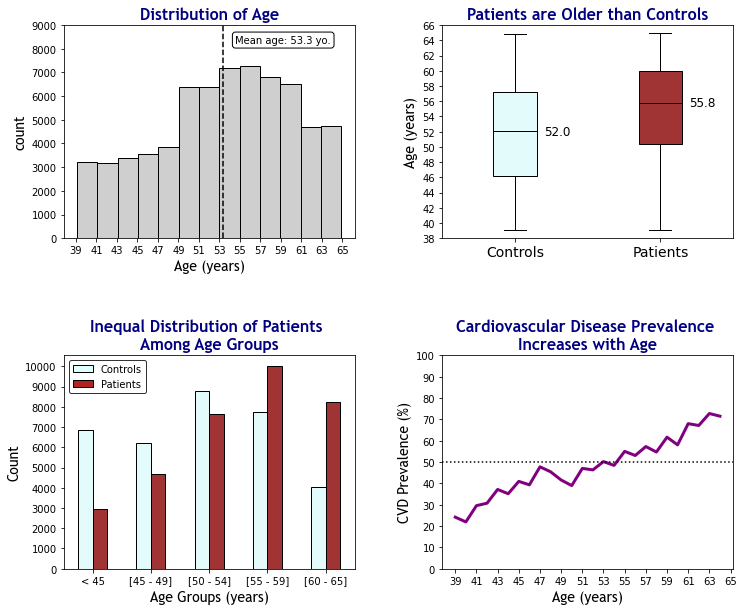

In [8]:
display(HTML(f"""
<div class = 'all'>
    <h1>Age</h1>
    <h3>Variable Description</h3>
</div>
"""))

univar_cont(df, [age])
  
    
display(HTML('<h3>Data Visualisation</h3>'))

# Creating a df for age-related viz, that specify the age group of a subject.

df_age = df[['age', 'cardio']]
df_age['age_group'] = df_age.apply(lambda row:
                             "< 45" if row['age'] < 45
                             else "[45 - 49]" if row['age'] < 50
                             else "[50 - 54]" if row['age'] < 55
                             else "[55 - 59]" if row['age'] < 60
                             else "[60 - 65]", axis = 1)

######FIGURE######
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
plt.subplots_adjust(hspace = 0.55, wspace = 0.3)


# HISTPLOT: distribution of age

sns.histplot(x = age.name, 
            data = df, bins = 13,
            ax = ax[0,0], 
            color = 'silver')

ax[0,0].axvline(x = np.mean(df[age.name]), color = 'black', linestyle = 'dashed')



ax[0,0].text(np.mean(df[age.name])+1.25,
        1.03*(np.max(ax[0,0].get_yticks())),
        f'Mean age: {np.mean(df[age.name]):.1f} yo.',
        bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})

ax[0,0].set_title(f'Distribution of {age.full_name}', fontdict = fontdict_title)
ax[0,0].set_ylabel('count', fontdict = fontdict_labels)
ax[0,0].set_xlabel(f'{age.full_name} ({age.unit})', fontdict = fontdict_labels)

ylim = [0,9000]
ax[0,0].set_ylim(ylim)
ax[0,0].set_yticks(range(0,10000,1000))

ax[0,0].set_xticks(range(39, 66, 2))

# BOXPLOT: Comparison of age distribution regarding CV status  
sns.boxplot(x = 'cardio',
            y = age.name,
            data = df,
            ax = ax[0,1],
            boxprops = {'edgecolor':'black'},
            capprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            medianprops = {'color': 'black'},
            palette = palette_cardio,
            width = 0.3)

ax[0,1].text(0.2, np.median(df[df['cardio'] == "0"]["age"]), f'{np.median(df[df["cardio"] == "0"]["age"]):.1f}', fontsize = 12, va = "center")
ax[0,1].text(1.2, np.median(df[df['cardio'] == "1"]["age"]), f'{np.median(df[df["cardio"] == "1"]["age"]):.1f}', fontsize = 12, va = "center")

ax[0,1].set_yticks(range(38,68,2))
ax[0,1].set_ylim([38,66])
ax[0,1].set_title(f'Patients are Older than Controls', fontdict = fontdict_title)
ax[0,1].set_ylabel(f'{age.full_name} ({age.unit})', fontdict = fontdict_labels)
ax[0,1].set_xlabel(None)
ax[0,1].set_xticks(ticks = ax[0,1].get_xticks(), labels = ['Controls', 'Patients'], fontsize = 14)

# COUNTPLOT: Prevalence of CV disease in every age group


sns.countplot(x = "age_group", 
            hue = "cardio",
            data = df_age, 
            order = ["< 45", "[45 - 49]", "[50 - 54]", "[55 - 59]", "[60 - 65]"], 
            ax = ax[1,0], 
            edgecolor = 'black', 
            width = 0.5,
            palette = palette_cardio
            )

ax[1,0].set_title('Inequal Distribution of Patients \nAmong Age Groups', fontdict = fontdict_title)
ax[1,0].set_ylabel('Count', fontdict = fontdict_labels)
ax[1,0].set_xlabel('Age Groups (years)', fontdict = fontdict_labels)
ax[1,0].set_yticks(range(0, 11000, 1000))

handles = [
    Patch(facecolor = palette_cardio["0"], edgecolor = 'black',  label = "Controls"),
    Patch(facecolor = palette_cardio["1"], edgecolor = 'black',  label = "Patients")
]

ax[1,0].legend(handles = handles, title = None, frameon = True, edgecolor = 'black')


# LINEPLOT: Prevalence of CV disease according to age
df_age['age'] = df_age['age'].astype('int64')
df_age.groupby('age').value_counts(normalize = True)
df_age_gb = df_age[['age', 'cardio']].groupby('age')['cardio'].value_counts(normalize = True).unstack().reset_index()


sns.lineplot(x = "age", 
            y = "1", 
            data = df_age_gb[df_age_gb["age"] >=39],
            ax = ax[1,1],
            color = 'purple',
            linewidth = 3
            )

ax[1,1].axhline(y = 0.5, linestyle = "dotted", color = 'black')

ax[1,1].set_title('Cardiovascular Disease Prevalence \nIncreases with Age', fontdict = fontdict_title)
ax[1,1].set_ylabel('CVD Prevalence (%)', fontdict = fontdict_labels)
ax[1,1].set_yticks(ticks = [x/10 for x in range(0,11,1)], labels = range(0,110,10))
ax[1,1].set_xlabel(f'{age.full_name} ({age.unit})', fontdict = fontdict_labels)
ax[1,1].set_xticks(ticks = range(39,66,2))

plt.show()


# Finding the lowest age where CVD prevalence > 50%:

df_min_age = df.copy()
df_min_age['age'] = df_min_age['age'].astype('int')
dfdf_min_age2 = df_min_age.groupby('age')['cardio'].value_counts(normalize = True).reset_index()
min_age_50 = np.min(dfdf_min_age2[(dfdf_min_age2['level_1'] == '1') & (dfdf_min_age2['cardio'] >= 0.5)])

display(HTML(f"""
    <div class = 'all'>
        <h3>Variable Analysis</h3>
        <p>
            The variable <code>{age.name}</code> is not normally distributed and shows a left skew. The minimal age value found
            in the original dataset was {np.min(df_raw['age'])/365.25:.1f} yo. There was {len(df_raw[df_raw['age']/365.25 < 32])}
            individuals below 32 years old, and there no subject in the age group [32 - 38] yo. None 
            of the subjects below 32 years old had cardiovascular disease, and they were considered outliers due to the existing age gap. It was decided to
            take them out of the analysis. Consequently, the range for <code>{age.name}</code> is
            <b>[{np.min(df[age.name]):.0f} - {np.max(df[age.name]):.0f}]</b> years old.
            The max age value is surprisingly low as cardiovascular diseases are common among older individuals,
            the reason why no data from elderly patients were recorded is not known, but was probably a protocol requirement.
        </p>
        <p>
            The prevalence of CV diseases is known to increase with age, as it is the case in this cohort. The proportion of
            patients in the age group [51 - 55] is <b>around 50%</b>. It is below 50% in younger individuals and above in older individuals.
            The mean age in patients is <b>{mean_sd_range(df[df['cardio'] == "1"], age)[0]}</b> years old compared to
            <b>{mean_sd_range(df[df['cardio'] == "0"], age)[0]}</b> years old in controls.
        </p>
    </div>
    <div class = 'all conclusion'>
        <h3>Conclusion</h3>
        <ul>
            <li>The mean age in the cohort was {mean_sd_range(df, age)[0]} yo.</li>
            <li>Age range was {mean_sd_range(df, age)[1]} yo: no children and no elderly people were included</li>
            <li>Patients in the cohort were older than controls, and the prevalence of CV disease linearly increased with age</li>
            <li>It could be worth adjusting the model on age, <i>ie</i> separating the data in two distinct dataframes with a cut-off value for age nearby 50 yo.</li>
        </ul>
    </div>
"""))

In [9]:
df_sex = df.groupby('sex')['cardio'].value_counts(normalize = True).unstack().reset_index().rename(columns = {'0': 'cardio_0', '1': 'cardio_1'})

df_sex_cardio = pd.melt(df_sex, id_vars = "sex", var_name = "cardio_type", value_name = "prevalence")

df_sex_cardio

,sex,cardio_type,prevalence
0,female,cardio_0,0.501427
1,male,cardio_0,0.498632
2,female,cardio_1,0.498573
3,male,cardio_1,0.501368


<h4>Code for: Analysis of Sex</h4>

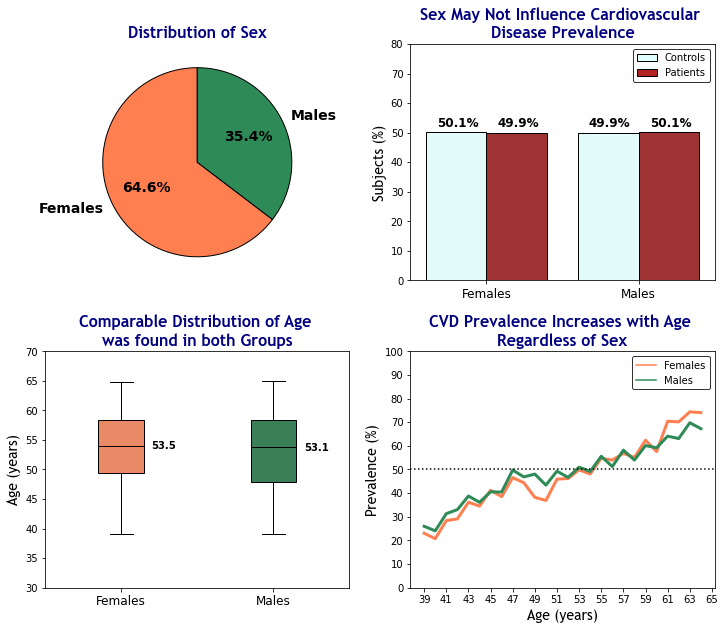

In [10]:
display(HTML(f"""
<div class = 'all'>
    <h1>Sex</h1>
    <p class = 'intro'>
        Note: This section specifically focuses on the relationship between sex and 
        age, as well as sex and cardiovascular disease prevalence. 
        Influence of sex on other variables is assessed in their dedicated sections.
    </p>
    <h3>Variable Description</h3>
</div>
"""))

univar_cat(df, [sex])
display(HTML('<h3>Data Visualisation</h3>'))

df_age_m = df[df['sex'] == 'male'][['age', 'cardio']]
df_age_m['age_group'] = df_age_m.apply(lambda row:
                                 "< 45" if row['age'] < 45
                                 else "[45 - 49]" if row['age'] < 50
                                 else "[50 - 54]" if row['age'] < 55
                                 else "[55 - 59]" if row['age'] < 60
                                 else "[60 - 65]", axis = 1)

df_age_m['age'] = df_age_m['age'].astype('int64')
df_age_m.groupby('age').value_counts(normalize = True)
df_age_gb_m = df_age_m[['age', 'cardio']].groupby('age')['cardio'].value_counts(normalize = True).unstack().reset_index()

df_age_f = df[df['sex'] == 'female'][['age', 'cardio']]
df_age_f['age_group'] = df_age_f.apply(lambda row:
                                 "< 45" if row['age'] < 45
                                 else "[45 - 49]" if row['age'] < 50
                                 else "[50 - 54]" if row['age'] < 55
                                 else "[55 - 59]" if row['age'] < 60
                                 else "[60 - 65]", axis = 1)

df_age_f['age'] = df_age_f['age'].astype('int64')
df_age_f.groupby('age').value_counts(normalize = True)
df_age_gb_f = df_age_f[['age', 'cardio']].groupby('age')['cardio'].value_counts(normalize = True).unstack().reset_index()

###### FIGURE ######

df_age_m = df[df['sex'] == 'male'][['age', 'cardio']]
df_age_m['age_group'] = df_age_m.apply(lambda row:
                                "< 45" if row['age'] < 45
                                else "[45 - 49]" if row['age'] < 50
                                else "[50 - 54]" if row['age'] < 55
                                else "[55 - 59]" if row['age'] < 60
                                else "[60 - 65]", axis = 1)

df_age_m['age'] = df_age_m['age'].astype('int64')
df_age_m.groupby('age').value_counts(normalize = True)
df_age_gb_m = df_age_m[['age', 'cardio']].groupby('age')['cardio'].value_counts(normalize = True).unstack().reset_index()

df_age_f = df[df['sex'] == 'female'][['age', 'cardio']]
df_age_f['age_group'] = df_age_f.apply(lambda row:
                                "< 45" if row['age'] < 45
                                else "[45 - 49]" if row['age'] < 50
                                else "[50 - 54]" if row['age'] < 55
                                else "[55 - 59]" if row['age'] < 60
                                else "[60 - 65]", axis = 1)

df_age_f['age'] = df_age_f['age'].astype('int64')
df_age_f.groupby('age').value_counts(normalize = True)
df_age_gb_f = df_age_f[['age', 'cardio']].groupby('age')['cardio'].value_counts(normalize = True).unstack().reset_index()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
plt.subplots_adjust(hspace = 0.3)

pie_females = df['sex'].value_counts(normalize = True)['female']
pie_males = df['sex'].value_counts(normalize = True)['male']

ax[0,0].pie(x = [pie_females, pie_males], 
        labels = ['Females', 'Males'], 
        colors = ['coral', 'seagreen'], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        wedgeprops = {'ec' : 'black'}, textprops = {'size' : 14, 'weight' : 'bold'})
ax[0,0].set_title('Distribution of Sex', fontdict = fontdict_title)

# BARPLOTS

df_sex = df.groupby('sex')['cardio'].value_counts(normalize = True).unstack().reset_index().rename(columns = {'0': 'cardio_0', '1': 'cardio_1'})
df_sex_cardio = pd.melt(df_sex, id_vars = "sex", var_name = "cardio_type", value_name = "prevalence")

sns.barplot(
    x = 'sex',
    y = 'prevalence',
    hue = 'cardio_type',
    data = df_sex_cardio,
    ax = ax[0,1],
    order = ['female', 'male'],
    edgecolor = 'black',
    palette = [palette_cardio["0"], palette_cardio["1"]]
    )

for container in ax[0,1].containers:
    for bar in container:
        x = bar.get_x()
        y = bar.get_height()
        ax[0,1].text(x + 0.21, y + 0.02, f'{y:.1%}', weight = 'bold', size = 12, ha = "center")

ylim = [0,0.8]
ax[0,1].set_ylim(ylim)
ax[0,1].set_yticks(ticks = [x/10 for x in range(0,9,1)], labels = range(0,90,10))

ax[0,1].set_yticks(ticks = ax[0,1].get_yticks())
ax[0,1].set_ylabel('Subjects (%)', fontdict = fontdict_labels)

ax[0,1].set_xticks(ticks = ax[0,1].get_xticks(), labels = ['Females', 'Males'], size = 12)
ax[0,1].set_xlabel(None)

ax[0,1].set_title(f'Sex May Not Influence Cardiovascular \nDisease Prevalence', fontdict = fontdict_title)

# Custom legend
handles = [
    Patch(facecolor = palette_cardio["0"], edgecolor = 'black', label = 'Controls'),
    Patch(facecolor = palette_cardio["1"], edgecolor = 'black', label = 'Patients')
]

ax[0,1].legend(
    handles = handles,
    edgecolor = 'black',
    title = None
    )


### Age Boxplot

sns.boxplot(x = "sex", 
            y = "age", 
            data = df, 
            palette = palette_sex,
            color = 'black',
            ax = ax[1,0],
            width = 0.3,
            boxprops={'edgecolor':'black'},
            capprops={'color':'black'},
            medianprops={'color':'black'},
            flierprops={'color':'black'},
            whiskerprops={'color':'black'}
        )

mean_age_fem = np.mean(df[df['sex'] == 'female']['age'])
mean_age_mal = np.mean(df[df['sex'] == 'male']['age'])

ax[1,0].text(0.2, round(mean_age_fem,1), f'{mean_age_fem:.1f}', fontweight = "bold", ha = "left")
ax[1,0].text(1.2, round(mean_age_mal,1), f'{mean_age_mal:.1f}', fontweight = "bold", ha = "left")

ax[1,0].set_ylim([30,70])
ax[1,0].set_yticks(ticks = range(30,75,5), labels = range(30,75,5))
ax[1,0].set_ylabel("Age (years)", fontdict = fontdict_labels)

ax[1,0].set_xticks(ticks = ax[1,0].get_xticks(), labels = ["Females", "Males"], fontsize = 12)
ax[1,0].set_xlabel(None)

ax[1,0].set_title("Comparable Distribution of Age \nwas found in both Groups", fontdict = fontdict_title)


# LINEPLOT

sns.lineplot(x = "age", 
            y = "1", 
            data = df_age_gb_f,
            ax = ax[1,1],
            color = palette_sex['female'],
            linewidth = 3
            )

sns.lineplot(x = "age", 
            y = "1", 
            data = df_age_gb_m,
            ax = ax[1,1],
            color = palette_sex['male'],
            linewidth = 3
            )

ax[1,1].axhline(y = 0.5, linestyle = "dotted", color = 'black')

ax[1,1].set_title('CVD Prevalence Increases with Age \nRegardless of Sex', fontdict = fontdict_title)
ax[1,1].set_ylabel('Prevalence (%)', fontdict = fontdict_labels)
ax[1,1].set_yticks(ticks = [x/10 for x in range(0,11,1)], labels = range(0,110,10))
ax[1,1].set_xlabel(f'{age.full_name} ({age.unit})', fontdict = fontdict_labels)
ax[1,1].set_xticks(ticks = range(39,66,2))

handles = [
    Line2D([0], [0], color = palette_sex['female'], label = 'Females', marker = None),
    Line2D([0], [0], color = palette_sex['male'], label = 'Males', marker = None)
]

ax[1,1].legend(
    handles = handles,
    title = None,
    edgecolor = 'black'
)

plt.show()

display(HTML(f"""
   <div class = 'all'>
        <h3>Variable Analysis</h3>
        <p>
            <code>sex</code> showed an important degree of imbalance, with roughly <b><sup>2</sup>/<sub>3</sub>
              of women</b> and <sup>1</sup>/<sub>3</sub> of men. The reasons
            for such an imbalance remain unclear in this age group, as it is closer to the expected sex ratio in a geriatric cohort.
        </p>
        <p>
            The distribution of cardiovascular disease among men and women is visually balanced, with a prevalence of
            <b>{df[df['sex'] == 'female']['cardio'].value_counts(normalize = True)["1"]:.1%}</b> among women and of
            <b>{df[df['sex'] == 'male']['cardio'].value_counts(normalize = True)["1"]:.1%}</b> among men. CV disease was not
            linked to sex according to chi² contingency test ({chi2_cardio(df, sex)}). Nevertheless, it should be kept in mind that having
            comparable proportion of Controls and Patients in each sex group might have been a protocol criteria, in which
            case this observation would be biased.
        </p>
        <p>
            Age distribution was comparable in both sex groups, with female having a mean age of <b>{np.mean(df[df['sex'] == 'female']['age']):.1f} ±
            {np.std(df[df['sex'] == 'female']['age']):.1f}</b> years old <i>vs.</i> 
            <b>{np.mean(df[df['sex'] == 'male']['age']):.1f} ± {np.std(df[df['sex'] == 'male']['age']):.1f}</b> years old in males. 
            Moreover, prevalence of cardiovascular disease increased with age in both sex group was superimposable.
        </p>
    </div>
"""))

display(HTML(f"""
    <div class = 'all conclusion'>
        <h3>Conclusion</h3>
        <ul>
            <li>No obvious influence of sex was observed, as CV disease prevalence was very close to 50% in both groups</li>
            <li>Prevalence of CV diseases increased with age in a comparable manner in both males and females</li>
            <li>As there is almost twice as much females in the cohort, we may consider rebalancing the training data to a 1:1 sex
            ratio or train distinct models for males and females</li>
        </ul>
    </div>
"""))

<h4>Code for: Analysis of BMI, Height and Weight</h4>

Parameter,Mean ± SD,Range,Normality
BMI (kg/m²),27.6 ± 5.1,[14.6 - 85.8],Not normally distributed $\mathit{p}$ < 10⁻⁴
Height (cm),164.6 ± 7.7,[131.0 - 207.0],Not normally distributed $\mathit{p}$ < 10⁻⁴
Weight (kg),74.7 ± 13.9,[50.7 - 200.0],Not normally distributed $\mathit{p}$ < 10⁻⁴


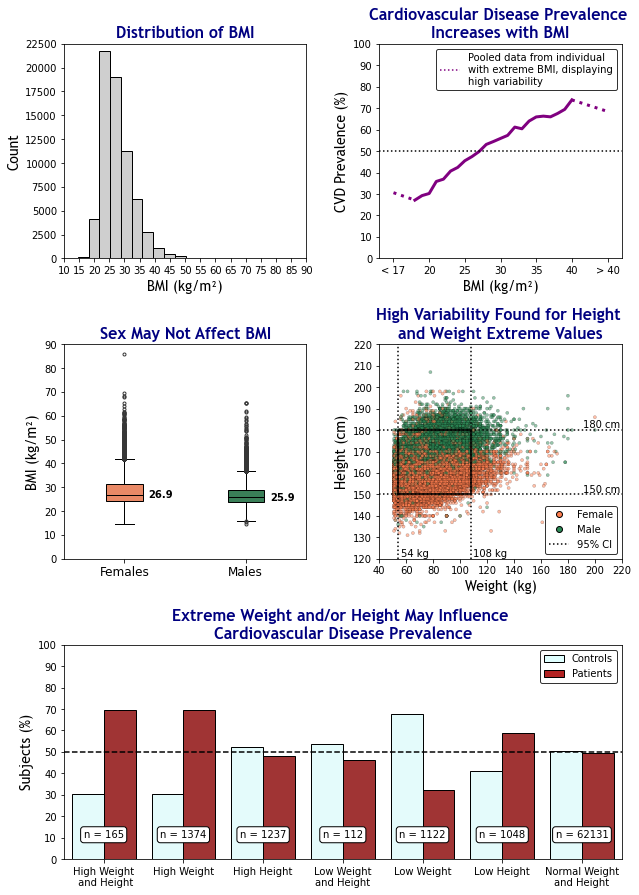

In [11]:
display(HTML(f"""
    <div class = 'all'>
        <h1>BMI, Height and Weight</h1>
        <h3>Variable Description</h3>
    </div>
"""))

univar_cont(df, [bmi, height, weight])

# Creating a df with rounded bmi and aggregated lower and upper values for plotting purpose

df['round_bmi'] = df.apply(lambda row: 45 if round(row['bmi'],0) > 40 else 
                           15 if round(row['bmi'],0) < 18 else round(row['bmi'],0), axis = 1)
df_bmi = df.groupby('round_bmi')['cardio'].value_counts(normalize = True).unstack().reset_index()


display(HTML('<h3>Data Visualisation</h3>'))

######FIGURE######
fig = plt.figure(figsize = (10, 15))
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
spec = gridspec.GridSpec(nrows = 3, ncols = 2)

# HISTPLOT bmi
ax = fig.add_subplot(spec[0, 0])
sns.histplot(x = 'bmi', data = df, ax = ax, color = 'silver', bins = 20)
ax.set_title('Distribution of BMI', fontdict = fontdict_title)
ax.set_xticks(range(0, int(np.max(ax.get_xticks())), 5))
ax.set_ylabel('Count', fontdict = fontdict_labels)
ax.set_xlabel('BMI (kg/m²)', fontdict = fontdict_labels)
ax.set_xlim([10,90])
ax.set_xticks(ticks = range(10,95,5), labels = range(10,95,5))
ax.set_ylim([0, 22500])
ax.set_yticks(ticks = range(0,25000,2500))

# LINEPLOT CV disease and BMI
ax = fig.add_subplot(spec[0, 1])
sns.lineplot(
    x = 'round_bmi',
    y = '1', 
    data = df_bmi[~df_bmi['round_bmi'].isin([15,45])], 
    color = 'purple', 
    linewidth = 3
)

sns.lineplot(
    x = 'round_bmi',
    y = '1', 
    data = df_bmi[df_bmi['round_bmi'].isin([15,18])], 
    color = 'purple', 
    linewidth = 3,
    linestyle = "dotted"
)

sns.lineplot(
    x = 'round_bmi',
    y = '1', 
    data = df_bmi[df_bmi['round_bmi'].isin([40,45])], 
    color = 'purple', 
    linewidth = 3,
    linestyle = "dotted"
)

ax.axhline(y = 0.5, linestyle = 'dotted', color = 'black')

handles = [
    Line2D([0], [0], label = "Pooled data from individual \nwith extreme BMI, displaying\nhigh variability", linestyle = "dotted", color = "purple")
]

ax.legend(handles = handles, title = None, edgecolor = "black")

ax.set_ylim([0,1])
ax.set_yticks(ticks = [x/10 for x in range(11)], labels = range(0,110,10))
ax.set_ylabel('CVD Prevalence (%)', fontdict = fontdict_labels)

ax.set_title('Cardiovascular Disease Prevalence \nIncreases with BMI', fontdict = fontdict_title)

ax.set_xlim([13,47])
ax.set_xticks(ticks = range(15,50,5), labels = ["< 17", 20, 25, 30, 35, 40, "> 40"])
ax.set_xlabel(bmi.label, fontdict = fontdict_labels)

# BMI distribution according to sex

ax = fig.add_subplot(spec[1,0])

sns.boxplot(
    x = "sex", 
    y = "bmi", 
    data = df,
    palette = palette_sex,
    width = 0.3,
    medianprops = {'color' : 'black'},
    boxprops = {'edgecolor': 'black'},
    flierprops = {'color' : 'black', 'markersize': 3},
    whiskerprops = {'color' : 'black'},
    capprops = {'color' : 'black'}
)

median_bmi_f = np.median(df[df['sex'] == 'female']['bmi'])
median_bmi_m = np.median(df[df['sex'] == 'male']['bmi'])

ax.text(0.3, median_bmi_f, f'{median_bmi_f:.1f}', ha = "center", va = "center", fontweight = "bold")
ax.text(1.3, median_bmi_m, f'{median_bmi_m:.1f}', ha = "center", va = "center", fontweight = "bold")

ax.set_ylim([0,90])
ax.set_yticks(ticks = range(0,100,10), labels = range(0,100,10))
ax.set_ylabel('BMI (kg/m²)', fontdict = fontdict_labels)

ax.set_xlabel(None)
ax.set_xticks(ticks = ax.get_xticks(), labels = ['Females', 'Males'], fontsize = 12)

ax.set_title("Sex May Not Affect BMI", fontdict = fontdict_title)

# SCATTERPLOT height weight sex
ax = fig.add_subplot(spec[1,1])
sns.scatterplot(x= 'weight',
                y = 'height',
                data = df,
                ax = ax,
                edgecolor = 'black',
                hue = 'sex',
                alpha = 0.5,
                palette = palette_sex,
                s = 10)

h_lo = np.percentile(df['height'], 2.5)
h_hi = np.percentile(df['height'], 97.5)
w_lo = np.percentile(df['weight'], 2.5)
w_hi = np.percentile(df['weight'], 97.5)

ax.axvline(w_lo, linestyle = 'dotted', color = 'black')
ax.axvline(w_hi, linestyle = 'dotted', color = 'black')
ax.axhline(h_lo, linestyle = 'dotted', color = 'black')
ax.axhline(h_hi, linestyle = 'dotted', color = 'black')
ax.plot([w_lo, w_hi, w_hi, w_lo, w_lo], [h_lo, h_lo, h_hi, h_hi, h_lo], color = 'black')

ax.set_title('High Variability Found for Height \nand Weight Extreme Values', fontdict = fontdict_title)
ax.set_ylabel('Weight (kg)', fontdict = fontdict_labels)

xlim = [40, 220]
ax.set_xlim(xlim)
ax.set_xticks(ticks = range(40,240,20), labels = range(40,240,20))
ax.set_xlabel('Weight (kg)', fontdict = fontdict_labels)

ax.set_ylabel('Height (cm)', fontdict = fontdict_labels)
ax.set_ylim([120, 220])
ax.set_yticks(ticks = range(120,230,10), labels = range(120,230,10))

ax.legend(title = 'Sex', frameon = True, edgecolor ='black')

ax_range = xlim[1] - xlim[0]
ax.text(w_lo + 0.01*ax_range, 121, f'{w_lo:.0f} kg')
ax.text(w_hi + 0.01*ax_range, 121, f'{w_hi:.0f} kg')
ax.text(xlim[1]-1, h_lo+1, f'{h_lo:.0f} cm', ha = "right")
ax.text(xlim[1]-1, h_hi+1, f'{h_hi:.0f} cm', ha = "right")

handles = [
    Line2D([0], [0], color = 'w', markerfacecolor = palette_sex['female'], label = 'Female', marker = 'o', markeredgecolor = 'black'),
    Line2D([0], [0], color = 'w', markerfacecolor = palette_sex['male'], label = 'Male', marker = 'o', markeredgecolor = 'black'),
    Line2D([0], [0], color = 'black', linestyle = 'dotted', label = '95% CI')
]

ax.legend(handles = handles, edgecolor = 'black')

# HISTPLOT focus on outliers
ax = fig.add_subplot(spec[2,:])

df["out_wh"] = df.apply(lambda row:
                        "hi_wh" if row['weight'] > w_hi and row['height'] > h_hi
                        else "hi_w" if row['weight'] > w_hi
                        else "hi_h" if row['height'] > h_hi
                        else "lo_wh" if row['weight'] < w_lo and row['height'] < h_lo
                        else "lo_w" if row['weight'] < w_lo
                        else "lo_h" if row['height'] < h_lo
                        else "normal", axis = 1
                    )

df_wh_temp = df.groupby('out_wh')['cardio'].value_counts(normalize = True).unstack().reset_index()
df_wh = pd.melt(df_wh_temp, id_vars = "out_wh", var_name = "cardio", value_name = "proportion") 

sns.barplot(x = 'out_wh', 
            y ="proportion",
            data = df_wh, 
            hue = "cardio", 
            ax =ax, 
            edgecolor = 'black', 
            order = ['hi_wh', 'hi_w', 'hi_h', 'lo_wh', 'lo_w', 'lo_h', 'normal'],
            palette = palette_cardio
        )

ax.axhline(y = 0.5, linestyle = 'dashed', color = 'black')

for index, group in enumerate(['hi_wh', 'hi_w', 'hi_h', 'lo_wh', 'lo_w', 'lo_h', 'normal']):
    ax.text(index, 0.1, f'n = {len(df[df["out_wh"] == group])}', ha ="center", bbox = {'facecolor' : 'white', 'edgecolor' : 'black', 'boxstyle' : 'round'})

ax.set_title('Extreme Weight and/or Height May Influence \nCardiovascular Disease Prevalence', fontdict = fontdict_title)

ylim = ([0,1])
ax.set_ylim(ylim)
ax.set_yticks(ticks = [x/10 for x in range(11)], labels = range(0,110,10))
ax.set_ylabel("Subjects (%)", fontdict = fontdict_labels)

ax.set_xlabel(None)
ax.set_xticklabels(['High Weight\n and Height', 'High Weight', 'High Height', 'Low Weight\nand Height', 'Low Weight', 'Low Height', 'Normal Weight\nand Height'])

handles = [
    Patch(facecolor = palette_cardio["0"], label = "Controls", edgecolor = "black"),
    Patch(facecolor = palette_cardio["1"], label = "Patients", edgecolor = "black")
]

ax.legend(handles = handles, title = None, edgecolor = "black")

plt.show()

display(HTML(f"""
    <div class ='all'>
        <h3>Variables Analysis</h3>
        <p>
            A wide range of values was covered by both <code>height</code> ({mean_sd_range(df, height)[1]} cm) and <code>weight</code>
        ({mean_sd_range(df, weight)[1]} kg). Consequently, range for <code>bmi</code> was <b>{mean_sd_range(df, bmi)[1]}</b> kg/m².
        The median values for <code>bmi</code> was <b>{np.median(df['bmi']):.1f}</b> kg/m². Men were taller than women, 
        but the distribution of BMI was comparable in both groups.
        </p>
        <p>
            Data suggest that the <b>prevalence of cardiovascular diseases increases
        with BMI</b>. Regarding weight and height, extreme values showed great variability; for both high and low values of height 
        and high values only for weight.
        </p>
        <p>
            The prevalence of cardiovascular disease was around <b>50%</b> among subjects with both height and weight within their
        respective 95% confidence interval ([{h_lo} - {h_hi}] cm for height and [{w_lo} - {w_hi}] kg for weight). On extreme
        values subgroups, weight seemed to have a greater influence on CV disease than height.
        </p>
    </div>
"""))

display(HTML(f"""
    <div class = 'all conclusion'>
        <h3>Conclusion</h3>
        <ul>
            <li>Cardiovascular diseases prevalence increases with BMI</li>
            <li>Distribution of <code>bmi</code> is right-skewed, with a max value of {np.max(df['bmi']):.1f} kg/m², but outlying
            values may have a limited impact</li>
            <li>Among subjects with outlying values for <code>height</code> and/or <code>weight</code>, weight seemed to have
            a greater influence than height</li>
            <li>It may be relevant to assess the influence of extreme values for <code>height</code> and <code>weight</code> on the 
            model</li>
        </ul>
    </div>
"""))

<h4>Code for: Analysis of Blood Pressure</h4>

Parameter,Mean ± SD,Range,Normality
Systolic Blood Pressure (mmHg),126.9 ± 16.6,[70.0 - 240.0],Not normally distributed $\mathit{p}$ < 10⁻⁴
Diastolic Blood Pressure (mmHg),81.5 ± 9.4,[45.0 - 182.0],Not normally distributed $\mathit{p}$ < 10⁻⁴
Mean Blood Pressure (mmHg),96.6 ± 11.0,[56.7 - 186.7],Not normally distributed $\mathit{p}$ < 10⁻⁴


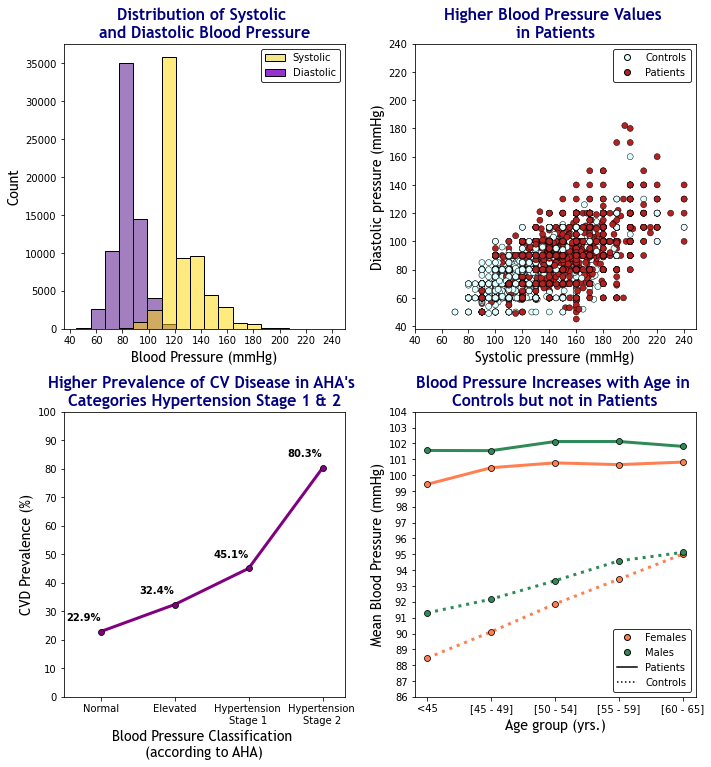

In [12]:
display(HTML(f"""
    <div class = 'all'>
        <h1>Blood Pressure</h1>
        <h3>Variables Description</h3>
    </div>
"""))

univar_cont(df, [ap_hi, ap_lo, ap_m])

univar_cat(df, [ap_aha])



display(HTML(f"""
    <div class = 'all'>
        <h4>Several issues were noted while exploring blood pressure data.</h4>
        <p>             
            <ul>
                <li>Negative values: A careful examination of these observations suggested that the negative sign had been mistakenly entered,
                as the absolute values were plausible values for systolic blood pressure (e.g., -150, -115, etc.) 
                or diastolic blood pressure values (-70).</li>
                <li>Zeros: There were 17 observation with the value 0 for <code>ap_lo</code>, all were considered missing values.</li>
                <li>Extremely low values: Regarding extremely low values, mainly between 11 
                and 15 for <code>ap_hi</code> and between 5 and 10 for <code>ap_lo</code>. It is very likely that these 
                values were entered in cmHg and not mmHg.</li>
                <li>Extremely high values: About 30 observations had extremely high values for <code>ap_hi</code>, again with patterns suggesting an issue
                with units, or that both systolic and diastolic were entered in the same column.</li>
                <li>Inconsistency between both features: In some cases, <code>ap_hi</code> was lower than <code>ap_lo</code>.
                A carefull review of said observations revealed that both values were clinically relevant, and were swapped back to
                the right column.</li>
            </ul>
            Negative values, zeros, extremely high and low values were all dropped, considering that the hypotheses to explain these
            values could not be verified. In addition, regarding the small number of affected observations compared to the dataset's 
            length, dropping these rows won't not impact the model, so it was safer to drop rows that could contain false values.
            Finally, regarding extreme values, it was arbitrarily decided to fix cut-off values of 60 and 300 for <code>ap_hi</code>
            and 40 and 250 for <code>ap_lo</code>.
        </p>
    </div>
"""))

display(HTML('<h3>Data Visualisations</h3>'))

df_ap = df[['age', 'sex', 'ap_hi', 'ap_lo', 'ap_m', 'ap_aha', 'cardio']]
df_ap['age'] = df_ap['age'].astype('int64')

df_ap['age_5'] = df_ap.apply(lambda row: 40 if row['age'] < 45
                             else 45 if row['age'] < 50
                             else 50 if row['age'] < 55
                             else 55 if row['age'] < 60
                             else 60 if row['age'] < 65
                             else 65, axis = 1)

df_ap_all = df_ap.groupby('age_5')['ap_m'].mean().reset_index()
df_ap_fem_0 = df_ap[(df_ap['sex'] == 'female') & (df_ap['cardio'] == "0")].groupby('age_5')['ap_m'].mean().reset_index()
df_ap_fem_1 = df_ap[(df_ap['sex'] == 'female') & (df_ap['cardio'] == "1")].groupby('age_5')['ap_m'].mean().reset_index()

df_ap_mal_0 = df_ap[(df_ap['sex'] == 'male') & (df_ap['cardio'] == "0")].groupby('age_5')['ap_m'].mean().reset_index()
df_ap_mal_1 = df_ap[(df_ap['sex'] == 'male') & (df_ap['cardio'] == "1")].groupby('age_5')['ap_m'].mean().reset_index()

######FIGURE######
fig  = plt.figure(figsize = (10,15))
spec = gridspec.GridSpec(nrows = 3, ncols = 2)

# HISTPLOT systolic and diastolic distribution
ax = fig.add_subplot(spec[0,0])
sns.histplot(
    data = df[['ap_hi', 'ap_lo']], 
    ax=ax,
    bins = 18, 
    palette = ['gold', 'indigo'])

ax.set_xticks(range(40, int(np.max(ax.get_xticks())), 20))
ax.set_title('Distribution of Systolic \nand Diastolic Blood Pressure', fontdict = fontdict_title)
ax.set_xlabel('Blood Pressure (mmHg)', fontdict = fontdict_labels)
ax.set_ylabel('Count', fontdict = fontdict_labels)

handles = [
    Patch(facecolor = 'khaki', edgecolor = 'black', label = 'Systolic'),
    Patch(facecolor = 'darkorchid', edgecolor = 'black', label = 'Diastolic')
]

ax.legend(handles = handles, title = None, edgecolor = 'black')

# SCATTERPLOT systolic and diastolic correlation
ax = fig.add_subplot(spec[0,1])
sns.scatterplot(
    x = 'ap_hi',
    y = 'ap_lo', 
    data = df, 
    ax = ax, 
    hue = 'cardio',
    palette = palette_cardio, 
    edgecolor = 'black', 
    alpha = 1, 
    hue_order = ["0", "1"], 
    )


ax.set_title('Higher Blood Pressure Values \nin Patients', fontdict = fontdict_title)
ax.set_xticks(range(40,250,20))
ax.set_yticks(range(40,250,20))
ax.set_xlabel('Systolic pressure (mmHg)', fontdict = fontdict_labels)
ax.set_ylabel('Diastolic pressure (mmHg)', fontdict = fontdict_labels)

handles = [
    Line2D([0], [0], color = 'white', marker = 'o', markerfacecolor= palette_cardio["0"], markeredgecolor='black', label = 'Controls'),
    Line2D([0], [0], color = 'white', marker = 'o', markerfacecolor= palette_cardio["1"], markeredgecolor='black', label = 'Patients')
]
ax.legend(title = None, handles = handles, edgecolor = 'black')


# Prevalence of CV disease according to ap_aha
ax = fig.add_subplot(spec[1,0])

cardio_aha = (df.groupby('ap_aha')['cardio'].value_counts(normalize = True)*100).unstack().reset_index().rename(columns = {"0" : "cardio_0", "1" : "cardio_1"})

sns.lineplot(
    x = "ap_aha", 
    y = "cardio_1", 
    data = cardio_aha, 
    linewidth = 3, 
    ax = ax, 
    color = "purple", 
    marker = "o",
    markeredgecolor = 'black'
    )

for i in range(1, 5, 1):
    prevalence = cardio_aha[cardio_aha['ap_aha'] == str(i)]['cardio_1'].values[0]
    ax.text(i-1, prevalence + 4, f'{prevalence:.1f}%', fontweight = 'bold', ha = "right")


ax.set_ylim(0,100)
ax.set_yticks(range(0,110,10))
ax.set_ylabel("CVD Prevalence (%)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ["Normal", "Elevated", "Hypertension \nStage 1", "Hypertension \nStage 2"])
ax.set_xlabel("Blood Pressure Classification \n(according to AHA)", fontdict = fontdict_labels)
ax.set_xlim(-0.5,3.3)
ax.set_title("Higher Prevalence of CV Disease in AHA's \nCategories Hypertension Stage 1 & 2", fontdict = fontdict_title)

# LINEPLOT ap as a function of age, sex and CV status
ax = fig.add_subplot(spec[1, 1])

sns.lineplot(
    x= 'age_5', 
    y= 'ap_m', 
    data = df_ap_fem_0, 
    color = palette_sex['female'], 
    linestyle = 'dotted', 
    linewidth = 3, 
    marker = 'o', 
    markeredgecolor = 'black'
    )

sns.lineplot(
    x= 'age_5',
    y= 'ap_m', 
    data = df_ap_fem_1, 
    color = palette_sex['female'], 
    linestyle = 'solid', 
    linewidth = 3, 
    marker = 'o', 
    markeredgecolor = 'black'
    )

sns.lineplot(
    x= 'age_5', 
    y= 'ap_m', 
    data = df_ap_mal_0, 
    color = palette_sex['male'], 
    linestyle = 'dotted', 
    linewidth = 3, 
    marker = 'o', 
    markeredgecolor = 'black'
    )

sns.lineplot(
    x= 'age_5', 
    y= 'ap_m', 
    data = df_ap_mal_1, 
    color = palette_sex['male'], 
    linestyle = 'solid', 
    linewidth = 3, 
    marker = 'o', 
    markeredgecolor = 'black'
    )

ax.set_ylim(86, 104)
ax.set_yticks(ticks = range(86,105,1), labels = range(86,105,1))
ax.set_ylabel("Mean Blood Pressure (mmHg)", fontdict = fontdict_labels)

ax.set_xticks(ticks = range(40, 65, 5), labels = ["<45", "[45 - 49]", "[50 - 54]", "[55 - 59]", "[60 - 65]"])
ax.set_xlabel("Age group (yrs.)", fontdict = fontdict_labels)

ax.set_title("Blood Pressure Increases with Age in \nControls but not in Patients", fontdict = fontdict_title)


handles = [
    Line2D([0], [0], color = 'white', marker = 'o', markerfacecolor = palette_sex['female'], markeredgecolor = 'black', label = 'Females'),
    Line2D([0], [0], color = 'white', marker = 'o', markerfacecolor = palette_sex['male'], markeredgecolor = 'black', label = 'Males'),
    Line2D([0], [0], color = "black", linestyle = "solid", label = "Patients"),
    Line2D([0], [0], color = "black", linestyle = "dotted", label = "Controls")
]

ax.legend(handles = handles, title = None, edgecolor = "black")
plt.tight_layout()
plt.show()

display(HTML(f"""
    <div class = 'all'>
        <h3>Variable Analysis</h3>
        <p>
             Both systolic and diastolic blood pressure displayed <b>substantial variability</b>, with wide range covered; and
        strongly correlated one with the other ({pval_txt(spearmanr(df['ap_hi'], df['ap_lo'])[1])}). With both systolic and
        diastolic blood pressure, <b>higher values were measured among patients with cardiovascular disease</b>
        ({pval_txt(mwu_cardio(df, ap_hi))} for systolic,  {pval_txt(mwu_cardio(df, ap_lo))} for diastolic 
        and {pval_txt(mwu_cardio(df, ap_m))} for mean blood pressure). 
        Such observations were expected as high blood pressure is known to be a risk factor
        for cardiovascular diseases.
        </p>
        <p>
        Prevalence increased with American Heart Association's categories, in a linear manner between categories
        "Normal", "Elevated" and "Hypertension Stage 1". There was an increase of approximately
        <b>11%</b> between these groups. However, prevalence <b>almost doubled</b> between categories
        "Hypertension Stage I (<b>{cardio_aha[cardio_aha['ap_aha'] == "3"]['cardio_1'].values[0]:.1f}%</b>)
        and "Hypertension Stage II" (<b>{cardio_aha[cardio_aha['ap_aha'] == "4"]['cardio_1'].values[0]:.1f}%</b>).
        </p>
        <p>
          Overall, <b>males subjects displayed higher levels</b> for mean blood pressure, 
        regardless of age or CV status. This difference tended to disminish with increasing age in controls, while it
        remained consistent in patients. Additionnaly, the mean blood pressure value was not affected by age in patients,
        whereas it increased with age in controls.
        </p>
    </div>
</div>"""))

display(HTML(f"""
<div class = 'all conclusion'>
    <h3>Conclusion</h3>
    <ul>
        <li>Only {df['ap_aha'].value_counts(normalize=True)['1']:.1%} of subjects had blood pressure classified as "Normal"</li>
        <li>Males displayed higher blood pressure values than females, regardless of cardiovascular status</li>
        <li>Blood pressure increased with age among controls, but remained almost constant in patients</li>
        <li>Prevalence of CV disease increased with AHA's categories, up to {cardio_aha[cardio_aha['ap_aha'] == "4"]['cardio_1'].values[0]:.1f}% among subjects
        in the "Hypertension Stage II" group</li>
    </ul>
</div>
"""))

<h4>Code for: Analysis of Glucose and Cholesterol</h4>

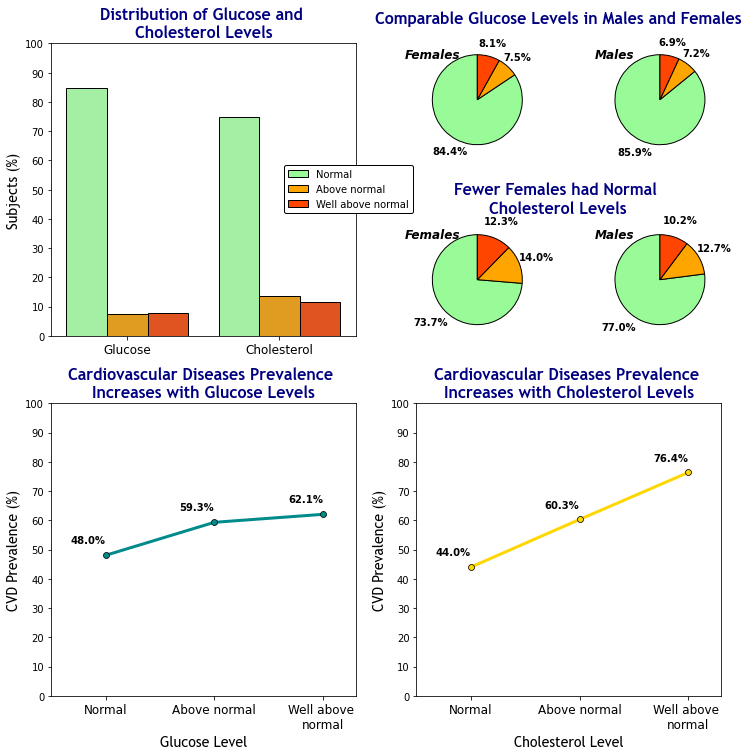

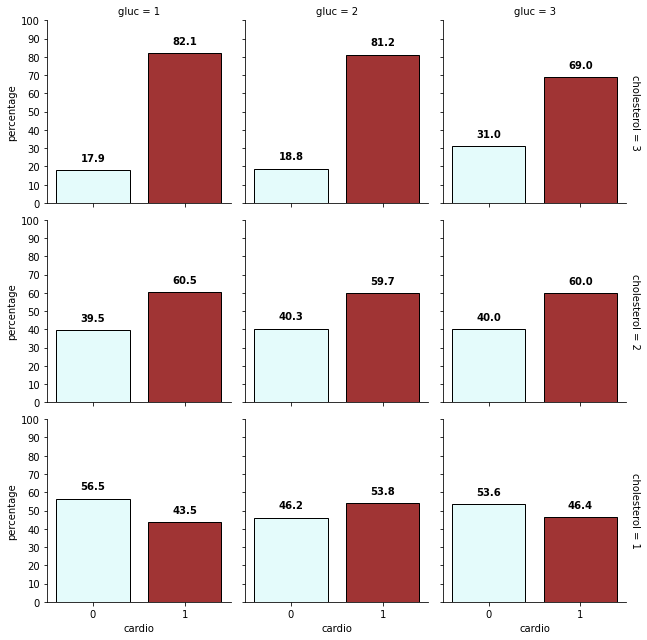

In [13]:
display(HTML(f"""
    <div class = 'all'>
        <h1>Glucose and Cholesterol</h1>
        <h3>Variables Description</h3>
    </div>
"""))

univar_cat(df, [cholesterol, gluc])

display(HTML('<h3>Data Visualisation</h3>'))

##### FIGURE #####

fig = plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.6, wspace = 0.5)
spec = gridspec.GridSpec(nrows = 4, ncols = 4)

# Barplots Chol and Gluc

df_gluc = df['gluc'].value_counts(normalize = True).reset_index(name = "glucose").rename(columns = {'index' : 'score'})
df_chol = df['cholesterol'].value_counts(normalize = True).reset_index().rename(columns = {'index' : 'score'})
df_gc_temp = df_gluc.merge(df_chol, how='inner', left_on='score', right_on='score')
df_gc = pd.melt(df_gc_temp, id_vars = "score", var_name = "parameter", value_name = "percentage")

palette_gc = ['palegreen', 'orange', 'orangered']

ax = fig.add_subplot(spec[0:2, 0:2])
sns.barplot(
    x = 'parameter', 
    y = 'percentage', 
    hue = 'score', 
    data = df_gc, 
    ax = ax, 
    edgecolor = "black", 
    palette = palette_gc)

ax.set_ylim(0,1)    
ax.set_yticks(ticks = [x/100 for x in range(0,105,10)], labels = range(0,105,10))
ax.set_ylabel('Subjects (%)', fontdict = fontdict_labels)

ax.set_xticklabels([tick.get_text().capitalize() for tick in ax.get_xticklabels()], size = 12)
ax.set_xlabel(None)

ax.set_title("Distribution of Glucose and \nCholesterol Levels", fontdict = fontdict_title)

handles = [
    Patch(facecolor = "palegreen", label = "Normal", edgecolor = "black"),
    Patch(facecolor = "orange", label = "Above normal", edgecolor = "black"),
    Patch(facecolor = "orangered", label = "Well above normal", edgecolor = "black")
]

ax.legend(handles = handles, title = None, edgecolor = "black", facecolor = 'white',framealpha=1, bbox_to_anchor = (0.75, 0.6))

# PIEPLOT Glucose Males and Females

pie_gluc_f = []
pie_gluc_m = []
pie_chol_f = []
pie_chol_m = []

for i in ["1", "2", "3"]:
    pie_gluc_f.append(df[df['sex'] == "female"]["gluc"].value_counts(normalize = True)[i])
    pie_gluc_m.append(df[df['sex'] == "male"]["gluc"].value_counts(normalize = True)[i])
    pie_chol_f.append(df[df['sex'] == "female"]["cholesterol"].value_counts(normalize = True)[i])
    pie_chol_m.append(df[df['sex'] == "male"]["cholesterol"].value_counts(normalize = True)[i])

ax = fig.add_subplot(spec[0,2])

ax.pie(
    x = pie_gluc_f,  
    colors = palette_gc, 
    autopct = '%1.1f%%',
    pctdistance = 1.3,
    startangle = 90, 
    wedgeprops = {'ec' : 'black'},
    textprops = {'weight' : 'bold'}
)

ax.text(1.8, 1.8, "Comparable Glucose Levels in Males and Females", fontdict = fontdict_title, ha = "center", va = "center")
ax.text(-1, 1, "Females", fontstyle = 'italic', fontweight = 'bold', fontsize = 12, ha = "center", va = "center")


ax = fig.add_subplot(spec[0,3])

ax.pie(
    x = pie_gluc_m, 
    colors = palette_gc, 
    autopct = '%1.1f%%', 
    pctdistance = 1.3,
    startangle = 90, 
    wedgeprops = {'ec' : 'black'},
    textprops = {'weight' : 'bold'}
)

ax.text(-1, 1, "Males", fontstyle = 'italic', fontweight = 'bold', fontsize = 12, ha = "center", va = "center")


ax = fig.add_subplot(spec[1,2])

ax.pie(
    x = pie_chol_f,  
    colors = palette_gc, 
    autopct = '%1.1f%%',
    pctdistance = 1.4,
    startangle = 90, 
    wedgeprops = {'ec' : 'black'},
    textprops = {'weight' : 'bold'}
)
ax.text(1.8, 1.8, "Fewer Females had Normal \nCholesterol Levels", fontdict = fontdict_title, ha = "center", va = "center")
ax.text(-1, 1, "Females", fontstyle = 'italic', fontweight = 'bold', fontsize = 12, ha = "center", va = "center")


ax = fig.add_subplot(spec[1,3])

ax.pie(
    x = pie_chol_m, 
    colors = palette_gc, 
    autopct = '%1.1f%%', 
    pctdistance = 1.4,
    startangle = 90, 
    wedgeprops = {'ec' : 'black'},
    textprops = {'weight' : 'bold'}
)

ax.text(-1, 1, "Males", fontstyle = 'italic', fontweight = 'bold', fontsize = 12, ha = "center", va = "center")


# CV prevalence and Gluc

ax = fig.add_subplot(spec[2:4, 0:2])

df_gluc = df.groupby('gluc')['cardio'].value_counts(normalize = True).unstack().reset_index()
df_gluc = df_gluc.rename(columns = {"gluc" : "glucose", "0" : "cardio_0", "1" : "cardio_1"})

sns.lineplot(
    x = "glucose", 
    y = "cardio_1", 
    data = df_gluc,
    color = "darkcyan", 
    ax = ax, 
    linewidth = 3,
    marker = "o",
    markeredgecolor = 'black'
)

for i in [1, 2, 3]:
    prevalence = df_gluc[df_gluc['glucose'] == str(i)]["cardio_1"].values[0]
    ax.text(i-1, prevalence + 0.04, f'{prevalence:.1%}', fontweight = 'bold', ha = "right")

ax.set_ylim(0,1)
ax.set_yticks(ticks = [x/10 for x in range(0, 11, 1)], labels = range(0,110,10))
ax.set_ylabel('CVD Prevalence (%)', fontdict = fontdict_labels)

ax.set_xlim(-0.5, 2.3)
ax.set_xticks(ax.get_xticks(), ['Normal', 'Above normal', 'Well above \nnormal'], size = 12)
ax.set_xlabel("Glucose Level", fontdict = fontdict_labels)

ax.set_title('Cardiovascular Diseases Prevalence \nIncreases with Glucose Levels', fontdict = fontdict_title)

# CV prevalence and Chol

ax = fig.add_subplot(spec[2:4, 2:4])

df_chol = df.groupby('cholesterol')['cardio'].value_counts(normalize = True).unstack().reset_index()
df_chol = df_chol.rename(columns = {"0" : "cardio_0", "1" : "cardio_1"})

sns.lineplot(
    x = "cholesterol", 
    y = "cardio_1", 
    data = df_chol, 
    color = "gold",
    linewidth = 3,
    marker = "o",
    ax = ax, 
    markeredgecolor = 'black'
)

for i in [1, 2, 3]:
    prevalence = df_chol[df_chol['cholesterol'] == str(i)]["cardio_1"].values[0]
    ax.text(i-1, prevalence + 0.04, f'{prevalence:.1%}', fontweight = 'bold', ha = "right")

ax.set_ylim(0,1)
ax.set_yticks(ticks = [x/10 for x in range(0, 11, 1)], labels = range(0,110,10))
ax.set_ylabel('CVD Prevalence (%)', fontdict = fontdict_labels)

ax.set_xlim(-0.5, 2.3)
ax.set_xticks(ax.get_xticks(), ['Normal', 'Above normal', 'Well above \nnormal'], size = 12)
ax.set_xlabel("Cholesterol Level", fontdict = fontdict_labels)

ax.set_title('Cardiovascular Diseases Prevalence \nIncreases with Cholesterol Levels', fontdict = fontdict_title)

plt.show()

# Table: Chol & Gluc

display(HTML(f"""
    <div class = 'all'>
        <h3>Cross Tabulation</h3>
    </div>
"""))

tab_gc = pd.crosstab(df['cholesterol'], df['gluc'], normalize = 'all')

display(HTML(f"""
<div class = 'all'>
    <table style = "width : 80%">
        <tr style = "background-color : white;">
            <th></th>
            <th></th>
            <th colspan = '3' style = 'border-left: 1px solid black'>Glucose</th>
        </tr>
        <tr style = 'background-color : white'>
            <th></th>
            <th></th>
            <td style = 'border-left : 1px solid black'>Normal</td>
            <td>Above normal</td>
            <td>Well above normal</td>
        </tr>
        <tr style = 'border-top : 1px solid black'>
            <th rowspan = "3" style = 'background-color : white'>Cholesterol</th>
            <td style = 'background-color : white; border-right: 1px solid black'>Normal</td>
            <td>{tab_gc.loc["1", "1"]:.1%}</td>
            <td>{tab_gc.loc["1", "2"]:.1%}</td>
            <td>{tab_gc.loc["1", "3"]:.1%}</td>            
        </tr>
        <tr>
            <td style = 'background-color : white; border-right: 1px solid black'>Above normal</td>
            <td>{tab_gc.loc["2", "1"]:.1%}</td>
            <td>{tab_gc.loc["2", "2"]:.1%}</td>
            <td>{tab_gc.loc["2", "3"]:.1%}</td>    
        </tr>
        <tr>
            <td style = 'background-color : white; border-right: 1px solid black'>Well above normal</td>
            <td>{tab_gc.loc["3", "1"]:.1%}</td>
            <td>{tab_gc.loc["3", "2"]:.1%}</td>
            <td>{tab_gc.loc["3", "3"]:.1%}</td>                
        </tr>
    </table>
</div>
"""))

# Grid: Chol & Gluc

display(HTML(f"""
<div class = 'all'>
<p style = 'color: navy; font-size: 18px; font-weight: bold'>Cardiovascular Status according to Glucose and Cholesterol</p>
</div>
"""))

df_percentage = df.groupby(['cholesterol', 'gluc', 'cardio']).size().reset_index(name='count')
df_percentage['percentage'] = df_percentage.groupby(['cholesterol', 'gluc'])['count'].apply(lambda x: x / x.sum() * 100)

g = sns.FacetGrid(df_percentage, col="gluc", row="cholesterol", margin_titles=True, row_order = ["3","2","1"])
g.map_dataframe(sns.barplot, x="cardio", y="percentage", palette= palette_cardio, edgecolor = 'black')

for ax in g.axes.flat:
    
    ax.set_ylim(0, 100)
    ax.set_yticks(ticks = range(0,110,10), labels = range(0,110,10))

    
    bar_y = [bar.get_height() for bar in ax.patches]
    
    ax.text(0, bar_y[0]+5, f"{bar_y[0]:.1f}", ha = "center", fontsize=10, fontweight='bold')
    ax.text(1, bar_y[1]+5, f"{bar_y[1]:.1f}", ha = "center", fontsize=10, fontweight='bold')

plt.show()

pval_chi2_gc = chi2_var(df, gluc, cholesterol)
pval_chi2_gluc = chi2_cardio(df, gluc)
pval_chi2_chol = chi2_cardio(df, cholesterol)


display(HTML(f"""
    <div class = 'all'>
        <h3>Variable Analysis</h3>
        <p>
            A large majority of subjects in the cohort had normal values for either glucose 
            (<b>{df["gluc"].value_counts(normalize = True)["1"]:.1%}</b>) or cholesterol
            (<b>{df["cholesterol"].value_counts(normalize = True)["1"]:.1%}</b>). Proportions of subjects
            labeled as "Above normal" and "Well above normal" were comparable in both variables.
        </p>
        <p>
            The prevalence of cardiovascular disease <b>increased</b> with the levels of both glucose and cholesterol. Prevalence 
            was of <b>{df[df["gluc"] == "1"]['cardio'].value_counts(normalize = True)["1"]:.1%}</b> among subjects with normal glucose,
            and of <b>{df[df["cholesterol"] == "1"]['cardio'].value_counts(normalize = True)["1"]:.1%}</b> among subjects with
            normal cholesterol. Prevalence <b>linearly</b> correlated with increasing levels of cholesterol, up to 
            <b>{df[df["cholesterol"] == "3"]['cardio'].value_counts(normalize = True)["1"]:.1%}</b> among subjects with cholesterol
            labeled as "Well above normal". Prevalence also increased with glucose levels, but remained constant between subjects
            with glucose labeled as "Above normal" and "Well above normal" (around 
            <b>{np.mean([df[df["gluc"] == "2"]['cardio'].value_counts(normalize = True)["1"], 
            df[df["gluc"] == "3"]['cardio'].value_counts(normalize = True)["1"]]):.0%}</b>).        
        </p>
        <p>
            Analysing both glucose and cholesterol levels together revealed that large majority of subjects had normal levels
            of both parameters (<b>{tab_gc.loc["1", "1"]:.1%}</b>). Interestingly, prevalence of CV disease remained relatively constant
            with increasing glucose levels, for a fixed cholesterol level. This suggest that while both parameters correlated 
            with cardiovascular disease status ({pval_chi2_gluc} for glucose and {pval_chi2_chol} for cholesterol),
            the feature <code>gluc</code> may bring limited information due to the influence of <code>cholesterol</code>.
        </p>
    </div>
"""))

display(HTML(f"""
    <div class = 'all conclusion'>
        <h3>Conclusion</h3>
        <ul>
            <li>Majority of subjects had normal values for both glucose and cholesterol ({tab_gc.loc["1", "1"]:.1%})</li>
            <li>Prevalence of cardiovascular diseases increased with glucose and cholesterol</li>
            <li>Modalities "Above normal" and "Well above normal" could be merged for <code>gluc</code></li>
            <li>Dropping <code>gluc</code> may be considered as it may bring a limited amount of information compared to 
            <code>cholesterol</code></li>
            <li>Cut-off values for both <code>gluc</code> and <code>cholesterol</code> modalities are not known, there could
            be some bias, they therefore need to be interpreted with caution</li>
        </ul>
    </div>
"""))

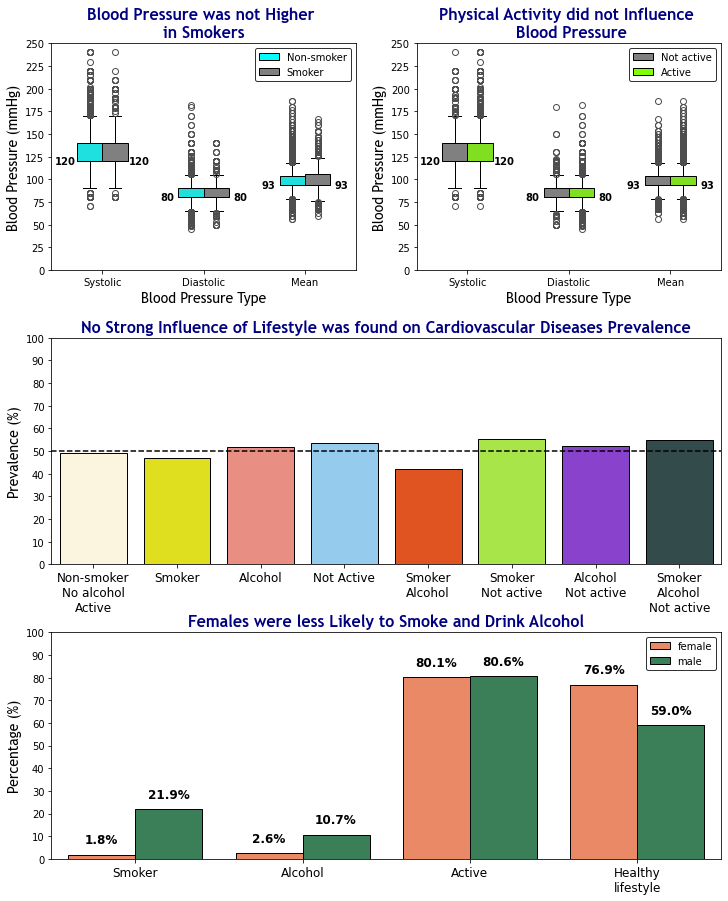

In [14]:
display(HTML(f"""
    <div class = 'all'>
        <h1>Lifestyle</h1>
        <h3>Variables Description</h3>
    </div>
"""))

univar_cat(df, [smoke, alco, active, lifestyle, healthy_ls])

display(HTML('<h3>Data Visualisations</h3>'))

##### FIGURE #####

fig = plt.figure(figsize = (12, 15))
spec = gridspec.GridSpec(nrows = 3, ncols = 2)
plt.subplots_adjust(hspace = 0.3)

# boxplot Tobbaco

df_smoke = pd.melt(
    df[['ap_hi', 'ap_lo', 'ap_m', 'smoke', 'cardio']], 
    id_vars = ['smoke', 'cardio'], 
    var_name = 'Pressure_type', 
    value_name = 'Pressure_value'
)

ax = fig.add_subplot(spec[0,0])
sns.boxplot(
    x = 'Pressure_type', 
    y = 'Pressure_value', 
    hue = 'smoke', 
    data = df_smoke, 
    width = 0.5, 
    palette = ['cyan', 'gray'],
    medianprops = {'color' : 'black'}, 
    boxprops = {'edgecolor' : 'black'},
    capprops = {'color' : 'black'},
    whiskerprops = {'color' : 'black'},
    flierprops = {'color' : 'black'},
    ax = ax
)

median_sys_smoke_0 = np.median(df[df['smoke'] == "0"]["ap_hi"])
median_sys_smoke_1 = np.median(df[df['smoke'] == "1"]["ap_hi"])

ax.text(-0.47, median_sys_smoke_0, f"{median_sys_smoke_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(0.47, median_sys_smoke_1, f"{median_sys_smoke_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")

median_dia_smoke_0 = np.median(df[df['smoke'] == "0"]["ap_lo"])
median_dia_smoke_1 = np.median(df[df['smoke'] == "1"]["ap_lo"])

ax.text(1-0.43, median_dia_smoke_0, f"{median_dia_smoke_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(1+0.43, median_dia_smoke_1, f"{median_dia_smoke_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")

median_m_smoke_0 = np.median(df[df['smoke'] == "0"]["ap_m"])
median_m_smoke_1 = np.median(df[df['smoke'] == "1"]["ap_m"])

ax.text(2-0.43, median_m_smoke_0, f"{median_m_smoke_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(2+0.43, median_m_smoke_1, f"{median_m_smoke_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")



ax.set_ylim(0,250)
ax.set_yticks(ticks = range(0, 275, 25))
ax.set_ylabel("Blood Pressure (mmHg)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['Systolic', 'Diastolic', 'Mean'])
ax.set_xlabel('Blood Pressure Type', fontdict = fontdict_labels)

ax.set_title('Blood Pressure was not Higher \nin Smokers', fontdict = fontdict_title)

handles = [
    Patch(facecolor = 'cyan', edgecolor = 'black', label = 'Non-smoker'),
    Patch(facecolor = 'gray', edgecolor = 'black', label = 'Smoker'),
]

ax.legend(handles = handles, title = None, edgecolor = 'black')

# boxplot Active

df_active = pd.melt(
    df[['ap_hi', 'ap_lo', 'ap_m', 'active', 'cardio']], 
    id_vars = ['active', 'cardio'], 
    var_name = 'Pressure_type', 
    value_name = 'Pressure_value'
)

ax = fig.add_subplot(spec[0,1])
sns.boxplot(
    x = 'Pressure_type', 
    y = 'Pressure_value', 
    hue = 'active', 
    data = df_active, 
    width = 0.5, 
    palette = ['gray', 'chartreuse'],
    medianprops = {'color' : 'black'}, 
    boxprops = {'edgecolor' : 'black'},
    capprops = {'color' : 'black'},
    whiskerprops = {'color' : 'black'},
    flierprops = {'color' : 'black'},
    ax = ax
)

median_sys_active_0 = np.median(df[df['active'] == "0"]["ap_hi"])
median_sys_active_1 = np.median(df[df['active'] == "1"]["ap_hi"])

ax.text(-0.47, median_sys_active_0, f"{median_sys_active_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(0.47, median_sys_active_1, f"{median_sys_active_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")

median_dia_active_0 = np.median(df[df['active'] == "0"]["ap_lo"])
median_dia_active_1 = np.median(df[df['active'] == "1"]["ap_lo"])

ax.text(1-0.43, median_dia_active_0, f"{median_dia_active_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(1+0.43, median_dia_active_1, f"{median_dia_active_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")

median_m_active_0 = np.median(df[df['active'] == "0"]["ap_m"])
median_m_active_1 = np.median(df[df['active'] == "1"]["ap_m"])

ax.text(2-0.43, median_m_active_0, f"{median_m_active_0:.0f}", fontweight = 'bold', ha = 'left', va = "center")
ax.text(2+0.43, median_m_active_1, f"{median_m_active_1:.0f}", fontweight = 'bold', ha = 'right', va = "center")

ax.set_ylim(0,250)
ax.set_yticks(ticks = range(0, 275, 25))
ax.set_ylabel("Blood Pressure (mmHg)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['Systolic', 'Diastolic', 'Mean'])
ax.set_xlabel('Blood Pressure Type', fontdict = fontdict_labels)

ax.set_title('Physical Activity did not Influence \n Blood Pressure', fontdict = fontdict_title)

handles = [
    Patch(facecolor = 'gray', edgecolor = 'black', label = 'Not active'),
    Patch(facecolor = 'chartreuse', edgecolor = 'black', label = 'Active'),
    Text("120", color='black', ha='center', va='center', fontweight='bold')
]

ax.legend(handles = handles, title = None, edgecolor = 'black')

# Lifestyle barplot

ax = fig.add_subplot(spec[1,:])


df_lifestyle = (df.groupby('lifestyle')['cardio'].value_counts(normalize = True)*100).sort_index().unstack().reset_index().rename(columns = {"0": "cardio_0", "1" : "cardio_1"})
sns.barplot(
    x = "lifestyle",
    y = "cardio_1", 
    data = df_lifestyle, 
    edgecolor = "black", 
    ax = ax,
    palette = ["cornsilk", "yellow", "salmon", "lightskyblue", "orangered", "greenyellow", "blueviolet", "darkslategray"]
)
ax.axhline(y = 50, linestyle = "dashed", color = "black")



ax.set_ylim(0,100)
ax.set_yticks(range(0,110,10))
ax.set_ylabel("Prevalence (%)", fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(),
            labels = [
    "Non-smoker\nNo alcohol\nActive",
    "Smoker",
    "Alcohol",
    "Not Active",
    "Smoker\nAlcohol",
    "Smoker\nNot active",
    "Alcohol\nNot active",
    "Smoker\nAlcohol\nNot active"    
], 
            size = 12)

ax.set_xlabel(None)

ax.set_title("No Strong Influence of Lifestyle was found on Cardiovascular Diseases Prevalence", fontdict = fontdict_title)

# barplot sex ratio lifestyle

ax = fig.add_subplot(spec[2, :])

df_sex_active = (df.groupby('sex')['active'].value_counts(normalize = True)*100).sort_index().unstack().reset_index().rename(columns = {"0": "active_0", "1" : "active_1"})
df_sex_smoke = (df.groupby('sex')['smoke'].value_counts(normalize = True)*100).sort_index().unstack().reset_index().rename(columns = {"0": "smoke_0", "1" : "smoke_1"})
df_sex_alco = (df.groupby('sex')['alco'].value_counts(normalize = True)*100).sort_index().unstack().reset_index().rename(columns = {"0": "alco_0", "1" : "alco_1"})
df_sex_healthy = (df.groupby('sex')['healthy_ls'].value_counts(normalize = True)*100).sort_index().unstack().reset_index().rename(columns = {"0": "healthy_0", "1" : "healthy_1"})
df_sex_ls = df_sex_active.merge(df_sex_smoke, on = "sex", how = "inner").merge(df_sex_alco, on = "sex", how = "inner").merge(df_sex_healthy, on = "sex", how = "inner")
df_sex_ls = pd.melt(df_sex_ls.drop(['active_0', 'smoke_0', 'alco_0', 'healthy_0'], axis = 1), id_vars = "sex", var_name = "parameter", value_name = "percentage")

sns.barplot(
    x = "parameter",
    y = "percentage",
    hue = "sex", 
    data = df_sex_ls,
    palette = palette_sex, 
    ax = ax,
    edgecolor = 'black',
    order = ['smoke_1', 'alco_1', 'active_1', 'healthy_1']
)

for container in ax.containers:
    for bar in container:
        y = bar.get_height()
        x = bar.get_x()
        ax.text(x + 0.2, y + 5, f'{y:.1f}%', fontweight='bold', fontsize = 12, ha = "center")


ax.set_ylim(0,100)
ax.set_yticks(ticks = range(0,110,10), labels = range(0,110,10))
ax.set_ylabel('Percentage (%)', fontdict = fontdict_labels)

ax.set_xticks(ticks = ax.get_xticks(), labels = ['Smoker', 'Alcohol', 'Active','Healthy\nlifestyle'], size = 12)
ax.set_xlabel(None)

ax.set_title("Females were less Likely to Smoke and Drink Alcohol", fontdict = fontdict_title)

ax.legend(title = None, edgecolor = 'black')

plt.show()

display(HTML(f"""
    <div class = 'all'>
        <h3>Variables analysis</h3>
        <p>
            A minority of subjects reported smoking (<b>{df['smoke'].value_counts(normalize = True)["1"]:.1%}</b>) or alcohol consumption
            (<b>{df['alco'].value_counts(normalize = True)["1"]:.1%}</b>), whereas they were <b>{df['active'].value_counts(normalize = True)["1"]:.1%}</b>
            to report some physical activity. This cohort therefore displayed overall healthy lifestyle, as 
            <b>{df['healthy_ls'].value_counts(normalize = True)["1"]:.1%}</b> of subject were non-smoker, did not drink alcohol, and had some 
            physical activity. On the other hand, there were only <b>{df['lifestyle'].value_counts(normalize = True)["7"]:.1%}</b>
            to report smoking, drinking alcohol and not exercising. Nevertheless, it should be kept in mind that the definition of 
            alcohol consumption and physical activity are not specified, and could therefore be biased.
        </p>
        <p>
            Surprisingly, <b>no obvious effect</b> of either either smoking or activity on blood pressure was found: median values were
            identical for systolic, diastolic and mean blood pressure, and distributions were comparable.        
        </p>
        <p>
            When subjects were divided into seven groups according to their lifestyle habits, no strong effect was found. Overall, 
            the prevalence of cardiovascular disease remained around <b>50%</b> in every group. A paradoxal tendency was seen in the group
            of subjects who smoke, drink alcohol and exercise, as they show the lower prevalence of CV disease
            (<b>{df_lifestyle.loc[df_lifestyle['lifestyle'] == "4",'cardio_1'].values[0]:.1f}%</b>), but the number of subjects in this group was very small
            (<i>n</i> = {df['lifestyle'].value_counts()["4"]:.0f}). This finding questions the relevance of the <code>smoke</code>
            feature: the information we would actually need to know is "<i>Was the subject a smoker a the time of diagnosis ?</i>".
            This feature may be biaised as it is likely that former smokers quitted smoking once the diagnosis was made.
            Another tendency found is that CV disease prevalance was the
            highest in all groups where subjects did not exercise, regardless of their other habits. No strong variation in age was
            found among all these groups.
        </p>
        <p>
            Finally, male subjects were <b>more likely</b> to smoke and drink alcohol than females: 
            <b>{df_sex_ls[(df_sex_ls['sex'] == 'male') & (df_sex_ls['parameter'] == "smoke_1")]['percentage'].values[0]:.1f}%</b> of males were
            smokers and <b>{df_sex_ls[(df_sex_ls['sex'] == 'male') & (df_sex_ls['parameter'] == "alco_1")]['percentage'].values[0]:.1f}%</b> drank
            alcohol, compared to <b>{df_sex_ls[(df_sex_ls['sex'] == 'female') & (df_sex_ls['parameter'] == "smoke_1")]['percentage'].values[0]:.1f}%</b>
            and <b>{df_sex_ls[(df_sex_ls['sex'] == 'female') & (df_sex_ls['parameter'] == "alco_1")]['percentage'].values[0]:.1f}%</b> respectively for females.
        </p>
    </div>
"""))

display(HTML(f"""
    <div class = 'all conclusion'>
        <h3>Conclusion</h3>
        <ul>
            <li>A small number of subjects reported smoking and or drinking alcohol, and these variables did not 
            display any obvious correlation with <code>cardio</code></li>
            <li>Smoking or exercising did not influence blood pressure levels</li>
            <li>A tendency of higher CV disease prevalence could exist among subjects that do not exercise</li>
            <li>Males were more likely to smoke and drink alcohol, while a comparable proportion of males and females
            reported physical activity</li>
            <li><code>smoke</code> should not be included in the model due to plausible bias</li>
        </ul>
    </div>
"""))

<h4>Code for: Target variable Analysis</h4>

In [15]:
display(HTML(f"""
<div class = 'all'>
    <h1>Target Variable</h1>
    <h3>Variable Description</h3>
</div>"""))

univar_cat(df, [cardio])

display(HTML(f"""
<div class = 'all'>
    <h3>Variable Analysis</h3>
    <p>The target variable was completely balanced among observations, with half individuals suffering from
    cardiovascular disease. Characteristics of the cohort are summarised in the following table:
    </p>
    <table class = 'table_1'>
        <tr class = 'head_tr'>
            <th>Variable</th>
            <th>Patients <br><i>n</n> = {len(df[df['cardio'] == "1"])}</th>
            <th>Controls <br><i>n</n> = {len(df[df['cardio'] == "0"])}</th>
            <th>Cohort <br><i>n</n> = {len(df)}</th>
        </tr>
        <tr>
            <td colspan = '4' style = 'background-color: lightcyan; font-variant: small-caps; text-align: left !important; line-height: 0.6; border: 1px solid black; font-weight: bold'>Demographic Variables</td>
        </tr>
        <tr>
            <td>Age (years)</td>
            <td>{mean_sd_1(df, age)}</td>
            <td>{mean_sd_0(df, age)}</td>
            <td>{mean_sd(df, age)}</td>
        </tr>
        <tr>
            <td>Male Sex</td>
            <td>{pp_1(df, sex)}</td>
            <td>{pp_0(df, sex)}</td>
            <td>{pp(df, sex)}</td>
        </tr>
        <tr>
            <td>Height (cm)</td>
            <td>{mean_sd_1(df, height)}</td>
            <td>{mean_sd_0(df, height)}</td>
            <td>{mean_sd(df, height)}</td>
        </tr>
        <tr>
            <td>Weight <br>(kg)</td>
            <td>{mean_sd_1(df, weight)}</td>
            <td>{mean_sd_0(df, weight)}</td>
            <td>{mean_sd(df, weight)}</td>
        </tr>
        <tr>
            <td>BMI <br>(kg/m²)</td>
            <td>{mean_sd_1(df, bmi)}</td>
            <td>{mean_sd_0(df, bmi)}</td>
            <td>{mean_sd(df, bmi)}</td>
        </tr>
        <tr>
            <td colspan = '4' style = 'background-color: lightcyan; font-variant: small-caps; text-align: left !important; line-height: 0.6; border: 1px solid black; font-weight: bold'>Blood Pressure</td>
        </tr>
        <tr>
            <td>Systolic Blood Pressure <br>(mmHg)</td>
            <td>{mean_sd_1(df, ap_hi)}</td>
            <td>{mean_sd_0(df, ap_hi)}</td>
            <td>{mean_sd(df, ap_hi)}</td>
        </tr>
        <tr>
            <td>Diastolic Blood Pressure <br>(mmHg)</td>
            <td>{mean_sd_1(df, ap_lo)}</td>
            <td>{mean_sd_0(df, ap_lo)}</td>
            <td>{mean_sd(df, ap_lo)}</td>
        </tr>
        <tr>
            <td colspan = '4' style = 'background-color: lightcyan; font-variant: small-caps; text-align: left !important; line-height: 0.6; border: 1px solid black; font-weight: bold'>Laboratory Data</td>
        </tr>
        <tr>
            <td>Cholesterol</td>
            <td>{pp_3_cardio(df, cholesterol, "1")}</td>
            <td>{pp_3_cardio(df, cholesterol, "0")}</td>
            <td>{pp_3(df, cholesterol)}</td>
        </tr>  
        <tr>
            <td>Glucose</td>
            <td>{pp_3_cardio(df, gluc, "1")}</td>
            <td>{pp_3_cardio(df, gluc, "0")}</td>
            <td>{pp_3(df, gluc)}</td>
        </tr>
        <tr>
            <td colspan = '4' style = 'background-color: lightcyan; font-variant: small-caps; text-align: left !important; line-height: 0.6; border: 1px solid black; font-weight: bold'>Lifestyle</td>
        </tr>
        <tr>
            <td>Smoke</td>
            <td>{pp_1(df, smoke)}</td>
            <td>{pp_0(df, smoke)}</td>
            <td>{pp(df, smoke)}</td>
        </tr>
        <tr>
            <td>Alcohol</td>
            <td>{pp_1(df, alco)}</td>
            <td>{pp_0(df, alco)}</td>
            <td>{pp(df, alco)}</td>
        </tr>
        <tr>
            <td>Physical activity</td>
            <td>{pp_1(df, active)}</td>
            <td>{pp_0(df, active)}</td>
            <td>{pp(df, active)}</td>
        </tr>
    </table>
</div>
"""))

<h4>Code for: Conclusion</h4>

In [16]:
display(HTML(f"""
    <div class = 'all'>
        <h1>Conclusion</h1>
        <p class = 'intro'>
            This project consisted in analysing a large dataset of {df_raw.shape[0]} rows and
            {df_raw.shape[1]} columns. The objective was to rework the dataset to make it 
            usable and to extract relevant visualizations.
        </p>
        <p class = 'intro'>
            Feature engineering led to modifying several variables, and 5 new features 
            were created. Features were analysed, so we could better understand how
            they relate with each other, especially with the feature target.
        </p>
        <h3>Major Findings</h3>
        <p>
            Several variables showed a strong correlation with the target feature: 
            prevalence of cardiovascular diseases increased with <b>age</b>, <b>BMI</b>
            and <b>blood pressure</b>, and with levels of <b>glucose</b> and <b>cholesterol</b>
            above normality.
        </p>
        <p>
            <b>Sex</b> on the other hand did not correlate with the feature target, as the
            prevalence of cardiovascular disease was very close to <b>50%</b> among 
            both males and females. Nevertheless, sex influenced several variables:
            men had higher blood pressure, while women had slightly higher levels of
            cholesterol. There was way more smokers among men and there were 
            also more likely to drink alcohol. Men were also taller than women, but
            the distribution of BMI was comparable for both sexes.
        </p>
        <h3>Insights for the Model to be built</h3>
        <p>
            The analysis has highlighted several avenues for designing an effective model:
            <ul>
                <li><code>age</code>: aging has a major influence on health in general.
                It could therefore be relevant to separate the training data in groups, either
                two groups (with a cut-off around 50 years old) or even into smaller age
                groups.</li>
                <li><code>sex</code> did not correlate with the target feature, but did with
                several other feature. It could be relevant to either rebalance the dataset to
                have 50% males (<i>vs.</i> the {df['sex'].value_counts(normalize = True)['male']:.1%}
                in the original dataset), or to train separe models for males and females.</li>
                <li><code>height</code>: this variable alone may not bring relevant information 
                (unlike <code>weight</code>) and could be dropped in favor of <code>bmi</code>.</li>
                <li><code>weight</code> and <code>bmi</code>: extreme values (high values especially)
                may not be representative, and could have a negative influence. It could be wise
                to compare the performances of the model with and without these extreme values.</li>
                <li><code>gluc</code> and <code>cholesterol</code>: in both case, majority of
                subjects had normal values for these variables. Pooling modalities <i>Above normal</i>
                and <i>Well above normal</i> could give more weight to these features. 
                <code>gluc</code> could also be dropped as it may not bring a lot of information,
                overshadowed by <code>cholesterol</code></li>
                <li><code>smoke</code>: it could be wise to drop this feature as it may be
                biaised, as explained in the <i>Lifestyle</i> section.</li>
            </ul>
        </p>
        <h3>Limits of the Analysis</h3>
        <p>
            Despite the analysis, some elements remain unclear:
            <ul>
                <li>Age range: individuals older than 65 years old would have been expected
                in such dataset</li>
                <li>Sex ratio: a sex ratio of 2 females for 1 male is unexpected in this age group</li>
                <li>The cut-off values for the glucose and cholesterol categories are not known,
                having a numeric values for these parameters would have been more appropriate</li>
                <li>The definition of physical activity is not known, and may be biased, limiting
                the information brought by this variable</li>
                <li>The definition of Cardiovascular disease is not known: there is a great
                variety of CV diseases that come with different clinical presentations. Such
                diversity may impair the performances of the model.</li>
            </ul>
            Some of this limits may be related to the original study protocol that lead to the production
            of this dataset. 
        </p>
    </div>
    <div class = 'all' style = 'border-top: 5px solid navy; margin-top: 40px'>
        <p class = 'intro' style = 'padding-top: 25px'>
            Ultimately, the project has effectively shaped a dataset suitable for machine 
            learning applications by implementing preprocessing techniques and utilising 
            data visualisations. The comprehensive analysis of the data has provided valuable 
            insights into the potential impacts of variables on the model.
            Looking ahead to the second part of the project, we will undertake specific 
            preprocessing steps, including encoding and standardization, as we prepare 
            for the development of the classification model.
        </p>
    </div>
"""))

<div class='signature'>
    Dr. Lucas Foulon-Pinto<a href="https://www.linkedin.com/in/lucasfoulonpinto/" target="_blank" style = "text-decoration: none; font-size: 20px">🐊</a>
    <br>Pharm.D, Ph.D
    <br>Autumn 2023
</div>